# Market Risk Project — Esilv — 2025-2026 — Alec Reynen & Carl Roussel

## **Question A (Ex2, part of Q1 and of Q2 of TD1)**

*a - From the time series of the daily prices of the stock Natixis between January 2015 and December 2016, provided with TD1, estimate a historical VaR on price returns at a one-day horizon for a given probability level (this probability is a parameter which must be changed easily). You must base your VaR on a non-parametric distribution (biweight Kernel, that is 𝐾 is the derivative of the logistic function
$
K(x) = \frac{15}{16} (1 - x^2)^2 \mathbb{1}_{\{|x| \le 1\}}
$)*

The objective of this section is to prepare the dataset for the Value-at-Risk (VaR) estimation. We work with the daily closing prices of **Natixis** stock.

Since financial prices are generally non-stationary, we compute the **daily arithmetic returns** $R_t$ defined as:
$$R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$
These returns will serve as the underlying variable for our risk metrics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Here below the Natixis data (daily prices of the stock **Natixis** between January 2015 and December 2018) and so we don't need a csv file :

In [2]:
natixis_DataSet = """
02/01/2015	5,621
05/01/2015	5,424
06/01/2015	5,329
07/01/2015	5,224
08/01/2015	5,453
09/01/2015	5,34
12/01/2015	5,264
13/01/2015	5,4
14/01/2015	5,311
15/01/2015	5,42
16/01/2015	5,492
19/01/2015	5,635
20/01/2015	5,729
21/01/2015	5,764
22/01/2015	5,952
23/01/2015	5,902
26/01/2015	5,903
27/01/2015	5,781
28/01/2015	5,722
29/01/2015	5,739
30/01/2015	5,652
02/02/2015	5,675
03/02/2015	5,846
04/02/2015	5,786
05/02/2015	5,765
06/02/2015	5,852
09/02/2015	5,756
10/02/2015	5,894
11/02/2015	5,813
12/02/2015	5,933
13/02/2015	6,116
16/02/2015	6,085
17/02/2015	6,183
18/02/2015	6,257
19/02/2015	6,381
20/02/2015	6,343
23/02/2015	6,4
24/02/2015	6,405
25/02/2015	6,353
26/02/2015	6,445
27/02/2015	6,47
02/03/2015	6,506
03/03/2015	6,373
04/03/2015	6,418
05/03/2015	6,402
06/03/2015	6,434
09/03/2015	6,429
10/03/2015	6,358
11/03/2015	6,531
12/03/2015	6,553
13/03/2015	6,62
16/03/2015	6,725
17/03/2015	6,64
18/03/2015	6,561
19/03/2015	6,602
20/03/2015	6,721
23/03/2015	6,724
24/03/2015	6,784
25/03/2015	6,728
26/03/2015	6,647
27/03/2015	6,851
30/03/2015	6,988
31/03/2015	6,961
01/04/2015	7,084
02/04/2015	7,145
07/04/2015	7,239
08/04/2015	7,264
09/04/2015	7,397
10/04/2015	7,356
13/04/2015	7,404
14/04/2015	7,413
15/04/2015	7,43
16/04/2015	7,35
17/04/2015	7,168
20/04/2015	7,25
21/04/2015	7,361
22/04/2015	7,445
23/04/2015	7,535
24/04/2015	7,646
27/04/2015	7,744
28/04/2015	7,662
29/04/2015	7,278
30/04/2015	7,386
04/05/2015	7,373
05/05/2015	7,122
06/05/2015	7,13
07/05/2015	7,119
08/05/2015	7,25
11/05/2015	7,22
12/05/2015	6,98
13/05/2015	7,034
14/05/2015	7,15
15/05/2015	7,137
18/05/2015	7,075
19/05/2015	7,207
20/05/2015	7,248
21/05/2015	7,247
22/05/2015	6,964
25/05/2015	6,861
26/05/2015	6,822
27/05/2015	6,96
28/05/2015	6,923
29/05/2015	6,826
01/06/2015	6,779
02/06/2015	6,762
03/06/2015	6,734
04/06/2015	6,723
05/06/2015	6,623
08/06/2015	6,483
09/06/2015	6,492
10/06/2015	6,608
11/06/2015	6,583
12/06/2015	6,497
15/06/2015	6,335
16/06/2015	6,423
17/06/2015	6,305
18/06/2015	6,318
19/06/2015	6,437
22/06/2015	6,722
23/06/2015	6,791
24/06/2015	6,744
25/06/2015	6,768
26/06/2015	6,797
29/06/2015	6,469
30/06/2015	6,455
01/07/2015	6,551
02/07/2015	6,44
03/07/2015	6,381
06/07/2015	6,132
07/07/2015	6,121
08/07/2015	6,171
09/07/2015	6,476
10/07/2015	6,716
13/07/2015	6,9
14/07/2015	6,909
15/07/2015	6,989
16/07/2015	7,03
17/07/2015	7,047
20/07/2015	7,141
21/07/2015	7,081
22/07/2015	7,076
23/07/2015	7,053
24/07/2015	6,993
27/07/2015	6,771
28/07/2015	6,843
29/07/2015	6,812
30/07/2015	6,526
31/07/2015	6,691
03/08/2015	6,755
04/08/2015	6,651
05/08/2015	6,678
06/08/2015	6,644
07/08/2015	6,384
10/08/2015	6,416
11/08/2015	6,402
12/08/2015	6,232
13/08/2015	6,414
14/08/2015	6,313
17/08/2015	6,289
18/08/2015	6,32
19/08/2015	6,212
20/08/2015	5,884
21/08/2015	5,573
24/08/2015	5,405
25/08/2015	5,755
26/08/2015	5,624
27/08/2015	5,797
28/08/2015	5,718
31/08/2015	5,66
01/09/2015	5,548
02/09/2015	5,526
03/09/2015	5,732
04/09/2015	5,581
07/09/2015	5,568
08/09/2015	5,597
09/09/2015	5,604
10/09/2015	5,526
11/09/2015	5,448
14/09/2015	5,375
15/09/2015	5,41
16/09/2015	5,369
17/09/2015	5,453
18/09/2015	5,258
21/09/2015	5,275
22/09/2015	5,06
23/09/2015	4,989
24/09/2015	5,052
25/09/2015	5,228
28/09/2015	5,046
29/09/2015	4,819
30/09/2015	4,939
01/10/2015	4,906
02/10/2015	4,955
05/10/2015	5,108
06/10/2015	5,312
07/10/2015	5,542
08/10/2015	5,61
09/10/2015	5,674
12/10/2015	5,547
13/10/2015	5,459
14/10/2015	5,409
15/10/2015	5,419
16/10/2015	5,52
19/10/2015	5,509
20/10/2015	5,397
21/10/2015	5,386
22/10/2015	5,469
23/10/2015	5,638
26/10/2015	5,607
27/10/2015	5,579
28/10/2015	5,601
29/10/2015	5,508
30/10/2015	5,58
02/11/2015	5,53
03/11/2015	5,476
04/11/2015	5,509
05/11/2015	5,793
06/11/2015	5,937
09/11/2015	5,812
10/11/2015	5,764
11/11/2015	5,861
12/11/2015	5,704
13/11/2015	5,664
16/11/2015	5,605
17/11/2015	5,699
18/11/2015	5,686
19/11/2015	5,764
20/11/2015	5,6
23/11/2015	5,616
24/11/2015	5,569
25/11/2015	5,581
26/11/2015	5,719
27/11/2015	5,662
30/11/2015	5,74
01/12/2015	5,755
02/12/2015	5,631
03/12/2015	5,606
04/12/2015	5,448
07/12/2015	5,453
08/12/2015	5,21
09/12/2015	5,21
10/12/2015	5,088
11/12/2015	5,002
14/12/2015	4,828
15/12/2015	5,034
16/12/2015	5,048
17/12/2015	5,253
18/12/2015	5,166
21/12/2015	5,04
22/12/2015	5,133
23/12/2015	5,257
24/12/2015	5,291
28/12/2015	5,24
29/12/2015	5,265
30/12/2015	5,204
31/12/2015	5,217
04/01/2016	4,984
05/01/2016	5,012
06/01/2016	4,852
07/01/2016	4,691
08/01/2016	4,59
11/01/2016	4,517
12/01/2016	4,571
13/01/2016	4,577
14/01/2016	4,463
15/01/2016	4,26
18/01/2016	4,017
19/01/2016	4,163
20/01/2016	3,985
21/01/2016	4,16
22/01/2016	4,375
25/01/2016	4,26
26/01/2016	4,367
27/01/2016	4,308
28/01/2016	4,437
29/01/2016	4,515
01/02/2016	4,47
02/02/2016	4,208
03/02/2016	4,025
04/02/2016	4,162
05/02/2016	4,277
08/02/2016	4,083
09/02/2016	3,86
10/02/2016	4,101
11/02/2016	4,329
12/02/2016	4,409
15/02/2016	4,652
16/02/2016	4,709
17/02/2016	4,732
18/02/2016	4,632
19/02/2016	4,54
22/02/2016	4,739
23/02/2016	4,643
24/02/2016	4,521
25/02/2016	4,65
26/02/2016	4,869
29/02/2016	4,936
01/03/2016	5,06
02/03/2016	5,145
03/03/2016	5,202
04/03/2016	5,169
07/03/2016	5,011
08/03/2016	4,93
09/03/2016	4,9
10/03/2016	4,78
11/03/2016	5,083
14/03/2016	5,024
15/03/2016	4,903
16/03/2016	4,863
17/03/2016	4,752
18/03/2016	4,738
21/03/2016	4,716
22/03/2016	4,679
23/03/2016	4,574
24/03/2016	4,426
29/03/2016	4,377
30/03/2016	4,365
31/03/2016	4,327
01/04/2016	4,326
04/04/2016	4,322
05/04/2016	4,191
06/04/2016	4,24
07/04/2016	4,163
08/04/2016	4,289
11/04/2016	4,374
12/04/2016	4,437
13/04/2016	4,785
14/04/2016	4,771
15/04/2016	4,68
18/04/2016	4,672
19/04/2016	4,724
20/04/2016	4,871
21/04/2016	4,856
22/04/2016	4,898
25/04/2016	4,738
26/04/2016	4,893
27/04/2016	4,847
28/04/2016	4,908
29/04/2016	4,817
02/05/2016	4,726
03/05/2016	4,542
04/05/2016	4,402
05/05/2016	4,334
06/05/2016	4,361
09/05/2016	4,386
10/05/2016	4,083
11/05/2016	4,201
12/05/2016	4,134
13/05/2016	4,229
16/05/2016	4,207
17/05/2016	4,266
18/05/2016	4,351
19/05/2016	4,337
20/05/2016	4,4
23/05/2016	4,4
24/05/2016	4,577
25/05/2016	4,75
26/05/2016	4,752
27/05/2016	4,46
30/05/2016	4,4
31/05/2016	4,338
01/06/2016	4,296
02/06/2016	4,301
03/06/2016	4,22
06/06/2016	4,185
07/06/2016	4,319
08/06/2016	4,288
09/06/2016	4,208
10/06/2016	4,053
13/06/2016	3,904
14/06/2016	3,805
15/06/2016	3,816
16/06/2016	3,735
17/06/2016	3,912
20/06/2016	4,055
21/06/2016	4,073
22/06/2016	4,05
23/06/2016	4,15
24/06/2016	3,439
27/06/2016	3,27
28/06/2016	3,347
29/06/2016	3,377
30/06/2016	3,409
01/07/2016	3,388
04/07/2016	3,336
05/07/2016	3,165
06/07/2016	3,077
07/07/2016	3,149
08/07/2016	3,309
11/07/2016	3,342
12/07/2016	3,427
13/07/2016	3,311
14/07/2016	3,475
15/07/2016	3,458
18/07/2016	3,426
19/07/2016	3,437
20/07/2016	3,462
21/07/2016	3,462
22/07/2016	3,455
25/07/2016	3,419
26/07/2016	3,382
27/07/2016	3,534
28/07/2016	3,425
29/07/2016	3,685
01/08/2016	3,643
02/08/2016	3,422
03/08/2016	3,408
04/08/2016	3,458
05/08/2016	3,589
08/08/2016	3,62
09/08/2016	3,712
10/08/2016	3,813
11/08/2016	3,804
12/08/2016	3,782
15/08/2016	3,772
16/08/2016	3,745
17/08/2016	3,672
18/08/2016	3,644
19/08/2016	3,59
22/08/2016	3,665
23/08/2016	3,737
24/08/2016	3,796
25/08/2016	3,773
26/08/2016	3,813
29/08/2016	3,77
30/08/2016	3,872
31/08/2016	3,966
01/09/2016	3,991
02/09/2016	4,045
05/09/2016	3,976
06/09/2016	3,963
07/09/2016	3,976
08/09/2016	4,072
09/09/2016	4,086
12/09/2016	3,965
13/09/2016	3,929
14/09/2016	3,936
15/09/2016	3,98
16/09/2016	4,018
19/09/2016	4,041
20/09/2016	3,963
21/09/2016	4,124
22/09/2016	4,143
23/09/2016	4,148
26/09/2016	4,063
27/09/2016	4,034
28/09/2016	4,069
29/09/2016	4,101
30/09/2016	4,149
03/10/2016	4,113
04/10/2016	4,223
05/10/2016	4,34
06/10/2016	4,412
07/10/2016	4,44
10/10/2016	4,446
11/10/2016	4,415
12/10/2016	4,379
13/10/2016	4,255
14/10/2016	4,344
17/10/2016	4,365
18/10/2016	4,392
19/10/2016	4,404
20/10/2016	4,434
21/10/2016	4,441
24/10/2016	4,593
25/10/2016	4,591
26/10/2016	4,594
27/10/2016	4,692
28/10/2016	4,709
31/10/2016	4,605
01/11/2016	4,537
02/11/2016	4,424
03/11/2016	4,503
04/11/2016	4,369
07/11/2016	4,504
08/11/2016	4,622
09/11/2016	4,476
10/11/2016	4,558
11/11/2016	4,675
14/11/2016	4,708
15/11/2016	4,68
16/11/2016	4,602
17/11/2016	4,628
18/11/2016	4,633
21/11/2016	4,617
22/11/2016	4,745
23/11/2016	4,712
24/11/2016	4,72
25/11/2016	4,71
28/11/2016	4,64
29/11/2016	4,677
30/11/2016	4,752
01/12/2016	4,886
02/12/2016	4,825
05/12/2016	4,959
06/12/2016	5,093
07/12/2016	5,214
08/12/2016	5,374
09/12/2016	5,392
12/12/2016	5,494
13/12/2016	5,451
14/12/2016	5,346
15/12/2016	5,44
16/12/2016	5,365
19/12/2016	5,299
20/12/2016	5,382
21/12/2016	5,398
22/12/2016	5,42
23/12/2016	5,376
27/12/2016	5,38
28/12/2016	5,379
29/12/2016	5,328
30/12/2016	5,36
02/01/2017	5,4
03/01/2017	5,62
04/01/2017	5,641
05/01/2017	5,595
06/01/2017	5,563
09/01/2017	5,448
10/01/2017	5,485
11/01/2017	5,437
12/01/2017	5,438
13/01/2017	5,606
16/01/2017	5,577
17/01/2017	5,488
18/01/2017	5,451
19/01/2017	5,5
20/01/2017	5,495
23/01/2017	5,355
24/01/2017	5,415
25/01/2017	5,689
26/01/2017	5,65
27/01/2017	5,64
30/01/2017	5,564
31/01/2017	5,485
01/02/2017	5,579
02/02/2017	5,569
03/02/2017	5,57
06/02/2017	5,509
07/02/2017	5,399
08/02/2017	5,228
09/02/2017	5,327
10/02/2017	5,45
13/02/2017	5,479
14/02/2017	5,52
15/02/2017	5,64
16/02/2017	5,601
17/02/2017	5,497
20/02/2017	5,393
21/02/2017	5,336
22/02/2017	5,301
23/02/2017	5,246
24/02/2017	5,15
27/02/2017	5,17
28/02/2017	5,151
01/03/2017	5,361
02/03/2017	5,374
03/03/2017	5,528
06/03/2017	5,435
07/03/2017	5,41
08/03/2017	5,435
09/03/2017	5,567
10/03/2017	5,659
13/03/2017	5,663
14/03/2017	5,613
15/03/2017	5,66
16/03/2017	5,667
17/03/2017	5,668
20/03/2017	5,632
21/03/2017	5,628
22/03/2017	5,579
23/03/2017	5,64
24/03/2017	5,591
27/03/2017	5,563
28/03/2017	5,671
29/03/2017	5,678
30/03/2017	5,723
31/03/2017	5,776
03/04/2017	5,689
04/04/2017	5,65
05/04/2017	5,662
06/04/2017	5,706
07/04/2017	5,75
10/04/2017	5,697
11/04/2017	5,626
12/04/2017	5,544
13/04/2017	5,41
18/04/2017	5,419
19/04/2017	5,538
20/04/2017	5,702
21/04/2017	5,793
24/04/2017	6,316
25/04/2017	6,348
26/04/2017	6,404
27/04/2017	6,358
28/04/2017	6,387
02/05/2017	6,44
03/05/2017	6,423
04/05/2017	6,485
05/05/2017	6,576
08/05/2017	6,464
09/05/2017	6,445
10/05/2017	6,525
11/05/2017	6,456
12/05/2017	6,404
15/05/2017	6,562
16/05/2017	6,552
17/05/2017	6,343
18/05/2017	6,254
19/05/2017	6,347
22/05/2017	6,281
23/05/2017	6,444
24/05/2017	6,525
25/05/2017	6,475
26/05/2017	6,121
29/05/2017	6,096
30/05/2017	5,937
31/05/2017	5,88
01/06/2017	5,956
02/06/2017	5,963
05/06/2017	5,914
06/06/2017	5,841
07/06/2017	5,872
08/06/2017	5,962
09/06/2017	6,063
12/06/2017	5,962
13/06/2017	5,998
14/06/2017	5,813
15/06/2017	5,821
16/06/2017	5,829
19/06/2017	5,955
20/06/2017	5,915
21/06/2017	5,866
22/06/2017	5,889
23/06/2017	5,812
26/06/2017	5,897
27/06/2017	5,945
28/06/2017	6,079
29/06/2017	6,002
30/06/2017	5,877
03/07/2017	6,096
04/07/2017	6,066
05/07/2017	6,027
06/07/2017	6,135
07/07/2017	6,101
10/07/2017	6,109
11/07/2017	6,089
12/07/2017	6,101
13/07/2017	6,205
14/07/2017	6,124
17/07/2017	6,086
18/07/2017	5,98
19/07/2017	6,011
20/07/2017	6,007
21/07/2017	5,92
24/07/2017	6,017
25/07/2017	6,143
26/07/2017	6,176
27/07/2017	6,179
28/07/2017	6,2
31/07/2017	6,143
01/08/2017	6,188
02/08/2017	6,214
03/08/2017	6,357
04/08/2017	6,531
07/08/2017	6,615
08/08/2017	6,68
09/08/2017	6,556
10/08/2017	6,524
11/08/2017	6,442
14/08/2017	6,487
15/08/2017	6,477
16/08/2017	6,505
17/08/2017	6,402
18/08/2017	6,4
21/08/2017	6,322
22/08/2017	6,381
23/08/2017	6,292
24/08/2017	6,296
25/08/2017	6,288
28/08/2017	6,225
29/08/2017	6,109
30/08/2017	6,153
31/08/2017	6,308
01/09/2017	6,299
04/09/2017	6,237
05/09/2017	6,184
06/09/2017	6,317
07/09/2017	6,25
08/09/2017	6,415
11/09/2017	6,479
12/09/2017	6,599
13/09/2017	6,495
14/09/2017	6,565
15/09/2017	6,462
18/09/2017	6,429
19/09/2017	6,439
20/09/2017	6,409
21/09/2017	6,603
22/09/2017	6,633
25/09/2017	6,556
26/09/2017	6,51
27/09/2017	6,697
28/09/2017	6,74
29/09/2017	6,77
02/10/2017	6,742
03/10/2017	6,955
04/10/2017	6,91
05/10/2017	7,006
06/10/2017	7
09/10/2017	6,95
10/10/2017	6,856
11/10/2017	6,795
12/10/2017	6,744
13/10/2017	6,561
16/10/2017	6,598
17/10/2017	6,613
18/10/2017	6,661
19/10/2017	6,623
20/10/2017	6,837
23/10/2017	6,805
24/10/2017	6,932
25/10/2017	6,849
26/10/2017	6,807
27/10/2017	6,84
30/10/2017	6,813
31/10/2017	6,732
01/11/2017	6,759
02/11/2017	6,753
03/11/2017	6,723
06/11/2017	6,631
07/11/2017	6,61
08/11/2017	6,765
09/11/2017	6,615
10/11/2017	6,643
13/11/2017	6,513
14/11/2017	6,438
15/11/2017	6,455
16/11/2017	6,542
17/11/2017	6,533
20/11/2017	6,473
21/11/2017	6,546
22/11/2017	6,502
23/11/2017	6,514
24/11/2017	6,593
27/11/2017	6,528
28/11/2017	6,498
29/11/2017	6,686
30/11/2017	6,81
01/12/2017	6,654
04/12/2017	6,819
05/12/2017	6,717
06/12/2017	6,622
07/12/2017	6,766
08/12/2017	6,728
11/12/2017	6,787
12/12/2017	6,807
13/12/2017	6,587
14/12/2017	6,585
15/12/2017	6,636
18/12/2017	6,755
19/12/2017	6,672
20/12/2017	6,623
21/12/2017	6,741
22/12/2017	6,681
27/12/2017	6,648
28/12/2017	6,635
29/12/2017	6,596
02/01/2018	6,676
03/01/2018	6,672
04/01/2018	6,908
05/01/2018	6,888
08/01/2018	6,9
09/01/2018	6,994
10/01/2018	7,04
11/01/2018	7,11
12/01/2018	7,114
15/01/2018	7,122
16/01/2018	7,12
17/01/2018	7,19
18/01/2018	7,288
19/01/2018	7,234
22/01/2018	7,39
23/01/2018	7,426
24/01/2018	7,35
25/01/2018	7,404
26/01/2018	7,386
29/01/2018	7,364
30/01/2018	7,308
31/01/2018	7,334
01/02/2018	7,378
02/02/2018	7,288
05/02/2018	7,144
06/02/2018	6,824
07/02/2018	7,118
08/02/2018	7,064
09/02/2018	6,962
12/02/2018	7,094
13/02/2018	7,064
14/02/2018	7,068
15/02/2018	7,026
16/02/2018	7,074
19/02/2018	7,17
20/02/2018	7,062
21/02/2018	7,074
22/02/2018	7,106
23/02/2018	7,056
26/02/2018	6,988
27/02/2018	7,076
28/02/2018	7,1
01/03/2018	7,008
02/03/2018	6,722
05/03/2018	6,74
06/03/2018	6,792
07/03/2018	6,814
08/03/2018	6,906
09/03/2018	6,89
12/03/2018	6,926
13/03/2018	6,932
14/03/2018	6,902
15/03/2018	6,884
16/03/2018	6,91
19/03/2018	6,858
20/03/2018	6,948
21/03/2018	6,944
22/03/2018	6,744
23/03/2018	6,67
26/03/2018	6,624
27/03/2018	6,756
28/03/2018	6,686
29/03/2018	6,658
03/04/2018	6,65
04/04/2018	6,434
05/04/2018	6,65
06/04/2018	6,556
09/04/2018	6,652
10/04/2018	6,698
11/04/2018	6,568
12/04/2018	6,696
13/04/2018	6,648
16/04/2018	6,644
17/04/2018	6,634
18/04/2018	6,588
19/04/2018	6,66
20/04/2018	6,592
23/04/2018	6,67
24/04/2018	6,74
25/04/2018	6,658
26/04/2018	6,72
27/04/2018	6,748
30/04/2018	6,812
02/05/2018	6,924
03/05/2018	6,796
04/05/2018	6,838
07/05/2018	6,864
08/05/2018	6,8
09/05/2018	6,816
10/05/2018	6,91
11/05/2018	6,94
14/05/2018	6,872
15/05/2018	6,882
16/05/2018	6,778
17/05/2018	6,826
18/05/2018	7,034
21/05/2018	7,066
22/05/2018	7,168
23/05/2018	7,044
24/05/2018	7,016
25/05/2018	6,95
28/05/2018	6,564
29/05/2018	6,25
30/05/2018	6,26
31/05/2018	6,198
01/06/2018	6,29
04/06/2018	6,282
05/06/2018	6,224
06/06/2018	6,262
07/06/2018	6,34
08/06/2018	6,28
11/06/2018	6,446
12/06/2018	6,426
13/06/2018	6,378
14/06/2018	6,39
15/06/2018	6,244
18/06/2018	6,188
19/06/2018	6,158
20/06/2018	6,16
21/06/2018	6,064
22/06/2018	6,108
25/06/2018	6,002
26/06/2018	6,018
27/06/2018	6,006
28/06/2018	5,98
29/06/2018	6,078
02/07/2018	5,984
03/07/2018	5,98
04/07/2018	6,004
05/07/2018	6,06
06/07/2018	6,038
09/07/2018	6,106
10/07/2018	6,092
11/07/2018	6,038
12/07/2018	6,05
13/07/2018	6,03
16/07/2018	6
17/07/2018	5,956
18/07/2018	5,97
19/07/2018	5,962
20/07/2018	5,892
23/07/2018	5,866
24/07/2018	6,036
25/07/2018	6
26/07/2018	5,978
27/07/2018	6,034
30/07/2018	6,076
31/07/2018	6,15
01/08/2018	6,078
02/08/2018	6,036
03/08/2018	6,122
06/08/2018	6,042
07/08/2018	6,184
08/08/2018	6,188
09/08/2018	6,158
10/08/2018	6,018
13/08/2018	5,914
14/08/2018	5,892
15/08/2018	5,818
16/08/2018	5,85
17/08/2018	5,794
20/08/2018	5,86
21/08/2018	5,862
22/08/2018	5,908
23/08/2018	5,888
24/08/2018	5,91
27/08/2018	5,948
28/08/2018	5,93
29/08/2018	5,852
30/08/2018	5,792
31/08/2018	5,75
03/09/2018	5,776
04/09/2018	5,786
05/09/2018	5,832
06/09/2018	5,804
07/09/2018	5,732
10/09/2018	5,782
11/09/2018	5,794
12/09/2018	5,776
13/09/2018	5,954
14/09/2018	5,85
17/09/2018	5,882
18/09/2018	5,974
19/09/2018	6,032
20/09/2018	6,044
21/09/2018	6,114
24/09/2018	6,066
25/09/2018	6,072
26/09/2018	6,042
27/09/2018	6,028
28/09/2018	5,844
01/10/2018	5,724
02/10/2018	5,69
03/10/2018	5,726
04/10/2018	5,838
05/10/2018	5,78
08/10/2018	5,712
09/10/2018	5,684
10/10/2018	5,63
11/10/2018	5,37
12/10/2018	5,37
15/10/2018	5,37
16/10/2018	5,386
17/10/2018	5,398
18/10/2018	5,284
19/10/2018	5,196
22/10/2018	5,158
23/10/2018	5,018
24/10/2018	4,94
25/10/2018	5,084
26/10/2018	5,004
29/10/2018	5,058
30/10/2018	5,042
31/10/2018	5,166
01/11/2018	5,17
02/11/2018	5,28
05/11/2018	5,22
06/11/2018	5,194
07/11/2018	5,284
08/11/2018	5,37
09/11/2018	5,282
12/11/2018	5,09
13/11/2018	5,124
14/11/2018	5,072
15/11/2018	4,968
16/11/2018	4,921
19/11/2018	4,924
20/11/2018	4,777
21/11/2018	4,85
22/11/2018	4,797
23/11/2018	4,848
26/11/2018	4,989
27/11/2018	4,987
28/11/2018	4,884
29/11/2018	4,945
30/11/2018	4,88
03/12/2018	5,006
04/12/2018	4,881
05/12/2018	4,774
06/12/2018	4,516
07/12/2018	4,55
10/12/2018	4,44
11/12/2018	4,527
12/12/2018	4,646
13/12/2018	4,63
14/12/2018	4,547
17/12/2018	4,433
18/12/2018	4,453
19/12/2018	4,171
20/12/2018	4,051
21/12/2018	4,045
24/12/2018	4,01
27/12/2018	3,938
28/12/2018	4,088
31/12/2018	4,119
"""

In [3]:
# Split the dataset into rows (keep all rows, no header to skip)
rows = natixis_DataSet.strip().split("\n")

# Parse rows into a list of dictionaries
records = [{"date": r.split("\t")[0], "price": r.split("\t")[1]}for r in rows]

# Create DataFrame
df = pd.DataFrame(records)

# Convert data types
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["price"] = df["price"].str.replace(",", ".").astype(float)

# Display first rows
df

,date,price
0,2015-01-02,5.621
1,2015-01-05,5.424
2,2015-01-06,5.329
3,2015-01-07,5.224
4,2015-01-08,5.453
...,...,...
1018,2018-12-21,4.045
1019,2018-12-24,4.010
1020,2018-12-27,3.938
1021,2018-12-28,4.088


In [4]:
# Compute daily returns as percentage changes
df["returns"] = df["price"].pct_change()
# Remove the first row (NaN return due to no previous price)
df.dropna(inplace=True)
df.head()

,date,price,returns
1,2015-01-05,5.424,-0.035047
2,2015-01-06,5.329,-0.017515
3,2015-01-07,5.224,-0.019704
4,2015-01-08,5.453,0.043836
5,2015-01-09,5.340,-0.020723


**Data Validation:**
The dataset has been successfully processed. We obtain a clean series of daily returns starting from January 2015. The first row (NaN) resulting from the percentage change calculation has been removed to ensure numerical stability in subsequent calculations.

We restrict our analysis to the **training period** (January 2015 to December 2016) to calibrate our risk model.

To estimate the probability density function of returns without assuming a Gaussian distribution, we use a **Kernel Density Estimation (KDE)**. As requested, we implement the **Biweight Kernel** $K(u)$:
$$K(u) = \frac{15}{16}(1 - u^2)^2 \mathbb{1}_{|u| \le 1}$$

A crucial parameter in KDE is the **bandwidth $h$**, which controls the smoothness of the distribution. We calculate $h$ using two standard rules of thumb:
1.  **Scott's Rule:** Optimization based on standard deviation : $h_{\text{Scott}}=1.06\cdot\hat\sigma\,n^{-1/5}$
2.  **Silverman's Rule:** More robust optimization using the Interquartile Range (IQR), often preferred for heavy-tailed distributions : $h_{\text{Silv}}=0.9\cdot\min\!\big(\hat\sigma,\ \text{IQR}/1.34\big)\,n^{-1/5}$

where :
- $h$ : the **bandwidth parameter**, which determines the level of smoothing applied to the kernel density estimate;  
- $\hat\sigma$ : the **standard deviation** of the return series;  
- $\text{IQR}$ : the **interquartile range**, computed as the difference between the 75th and 25th percentiles of the sample;  
- $n$ : the **sample size**, i.e., the total number of observations in the dataset.


In [5]:
# Select only returns between January 2015 and December 2016
returns = df[(df["date"] >= "2015-01-01") & (df["date"] <= "2016-12-31")]["returns"]
returns

1     -0.035047
2     -0.017515
3     -0.019704
4      0.043836
5     -0.020723
         ...   
508   -0.008118
509    0.000744
510   -0.000186
511   -0.009481
512    0.006006
Name: returns, Length: 512, dtype: float64

In [6]:
def K(u):
    return (15 / 16) * (1 - u**2)**2 * (np.abs(u) <= 1)

In [7]:
sigma = np.std(returns)
n = len(returns)
q75, q25 = np.percentile(returns, [75, 25])
iqr = q75 - q25

h_scott = 1.06 * sigma * n**(-0.2)
h_silverman = 0.9 * min(sigma, iqr / 1.34) * n**(-0.2)

print(f"Scott's rule: {h_scott:.6f}")
print(f"Silverman's rule: {h_silverman:.6f}")

Scott's rule: 0.007265
Silverman's rule: 0.005443


**Bandwidth Selection:**
The calculated bandwidths are very similar ($h \approx 0.006$). However, financial returns typically exhibit "fat tails" (excess kurtosis). Since **Silverman's rule** incorporates the Interquartile Range (IQR), it is less sensitive to outliers than Scott's rule.

**Decision:** We will use **Silverman's bandwidth** for the VaR calculation to ensure a more robust estimation of the tail risk.

Using the selected bandwidths, we construct the estimated Probability Density Function (PDF) $\hat{f}_h(x)$ over a grid of potential returns. The estimation follows the formula:

$$\hat{f}_h(x) = \frac{1}{nh} \sum_{i=1}^n K\left(\frac{x - X_i}{h}\right)$$

where $n$ is the sample size, $h$ is the bandwidth, and $K$ is the Biweight kernel. We will plot these estimated densities against the empirical histogram to visually assess the goodness-of-fit.

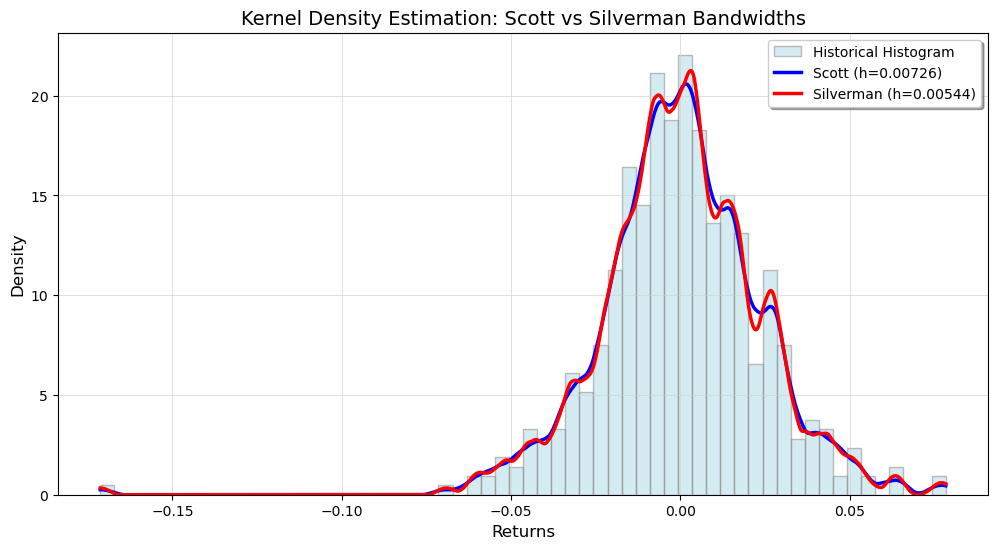

In [8]:
def calculate_density_curve(dataset, h, grid):
    y_values = []
    n = len(dataset)
    for x in grid:
        u = (x - dataset) / h
        val = (1 / (n * h)) * np.sum(K(u))
        y_values.append(val)
    return np.array(y_values)

x_grid = np.linspace(np.min(returns), np.max(returns), 1000)

y_scott = calculate_density_curve(returns, h_scott, x_grid)
y_silverman = calculate_density_curve(returns, h_silverman, x_grid)

plt.figure(figsize=(12, 6))
plt.hist(returns, bins=60, density=True, alpha=0.5, color='lightblue', edgecolor='gray', label='Historical Histogram')
plt.plot(x_grid, y_scott, color='blue', linewidth=2.5, label=f'Scott (h={h_scott:.5f})')
plt.plot(x_grid, y_silverman, color='red', linewidth=2.5, linestyle='-', label=f'Silverman (h={h_silverman:.5f})')
plt.title('Kernel Density Estimation: Scott vs Silverman Bandwidths', fontsize=14)
plt.xlabel('Returns', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(frameon=True, shadow=True)
plt.grid(axis='both', linestyle='-', linewidth=0.5, color='lightgrey')
plt.show()

The plot above compares the density estimations using Scott's rule (Blue) and Silverman's rule (Red).

* **Scott's rule** produces a smoother curve but tends to underfit the central peak of the distribution.
* **Silverman's rule**, with a slightly narrower bandwidth, captures the distribution's features and "peaks" more accurately, providing a tighter fit to the historical data.

**Conclusion:** We confirm our choice to proceed with **Silverman's bandwidth** for the Value-at-Risk calculation, as it offers a more precise representation of the return distribution's structure.

The Value-at-Risk (VaR) corresponds to a specific **quantile** of the distribution. To extract it, we must convert our Probability Density Function (PDF) into a **Cumulative Distribution Function (CDF)** defined as:

$$F_h(x) = \int_{-\infty}^{x} \hat{f}_h(t) dt$$

Since we use the Biweight kernel (a polynomial), we can integrate it analytically. We define the `biweight_cdf` function corresponding to the integral of $K(u)$.
We then plot this smoothed CDF. The intersection between the CDF curve and the horizontal line at $y = \alpha$ (e.g., $5\%$) visually indicates the position of the VaR.

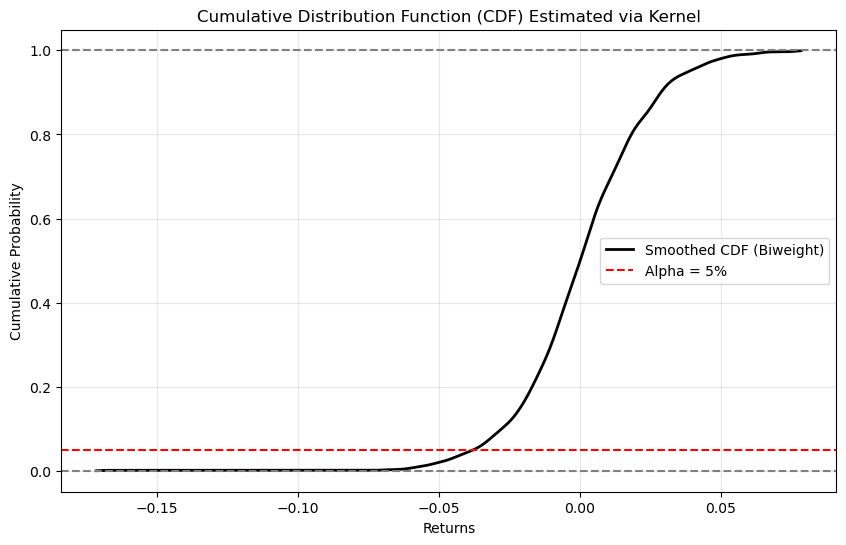

In [9]:
def biweight_cdf(u):
    if u <= -1:
        return 0.0
    elif u >= 1:
        return 1.0
    return (15 / 16) * (u - (2 / 3) * u**3 + (1 / 5) * u**5 + (8 / 15))

x_grid = np.linspace(np.min(returns), np.max(returns), 1000)
cdf_values = []
n = len(returns)

for x in x_grid:
    u_values = (x - returns) / h_silverman
    val = np.sum([biweight_cdf(u) for u in u_values]) / n
    cdf_values.append(val)

plt.figure(figsize=(10, 6))
plt.plot(x_grid, cdf_values, color='black', linewidth=2, label='Smoothed CDF (Biweight)')
plt.axhline(0, color='grey', linestyle='--')
plt.axhline(1, color='grey', linestyle='--')
plt.axhline(0.05, color='red', linestyle='--', label='Alpha = 5%')
plt.title('Cumulative Distribution Function (CDF) Estimated via Kernel')
plt.xlabel('Returns')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Graph Analysis:**
The plot above illustrates the **Smoothed Cumulative Distribution Function**.
* The **black curve** represents the cumulative probability of returns.
* The **red dashed line** represents the confidence level $\alpha$ (set here at 5%).

**Interpretation:** The exact point where the black curve crosses the red line corresponds to the return threshold below which 5% of the observations fall. This x-coordinate is, by definition, our **Non-Parametric VaR**. The next step is to solve this numerically to get the precise value.

Now that we have the cumulative distribution function (CDF), we can precisely determine the Value-at-Risk.

We define the VaR at a confidence level of $95\%$ as the loss threshold that is expected to be exceeded with a probability of only $5\%$. Since the VaR is conventionally expressed as a positive number while losses correspond to negative returns, we solve for the quantile $q_{0.05}$:

$$\mathbb{P}(X \le -\text{VaR}_{95\%}) = 0.05$$

Equivalently, using the CDF $F_h$:
$$-\text{VaR}_{95\%} = F_h^{-1}(0.05)$$

The following function scans the grid of returns to find the exact return $x$ where the cumulative probability reaches $0.05$. The VaR will be the absolute value of this return.

In [10]:
def get_kernel_var_value(dataset, h, alpha, grid_size=10000):
    n = len(dataset)
    x_min = np.min(dataset) - 3 * h
    x_max = np.max(dataset) + 3 * h
    x_grid = np.linspace(x_min, x_max, grid_size)
    
    cdf_values = []
    for x in x_grid:
        u = (x - dataset) / h
        val = np.sum([biweight_cdf(k) for k in u]) / n
        cdf_values.append(val)
        
    idx = np.argmin(np.abs(np.array(cdf_values) - alpha))
    return - x_grid[idx]

alpha = 0.05
var_value = get_kernel_var_value(returns, h_silverman, alpha)

print(f"Historical VaR (Biweight Kernel) at {1-alpha:.0%}: {var_value:.6f}")

Historical VaR (Biweight Kernel) at 95%: 0.037988


**Result Analysis:**
The estimated **Historical VaR (95%)** using the Biweight Kernel is approximately **3.80%** (0.037988).

**Interpretation:**
Based on the market dynamics observed between 2015 and 2016, there is a 95% probability that the daily loss of Natixis stock will not exceed **3.80%**. Conversely, a loss greater than this threshold is expected to occur only once every 20 days on average.

## **Question A (Ex2, part of Q1 and of Q2 of TD1)**

*b - Which proportion of price returns between January 2017 and December 2018 does exceed the VaR threshold defined in the previous question? Do you validate the choice of this non-parametric VaR?*

The final step for Question A is to validate our model. A VaR model is considered valid if the empirical frequency of losses exceeding the estimated threshold is close to the theoretical confidence level $\alpha$ (here 5%).

We perform this "Backtesting" on two datasets:
1.  **In-Sample (2015-2016):** To verify that our optimization correctly identified the 5% quantile on the training data.
2.  **Out-of-Sample (2017-2018):** To test the model's predictive power on unseen data.

We calculate the **Failure Rate** defined as:
$$\text{Failure Rate} = \frac{1}{N} \sum_{t=1}^{N} \mathbb{1}_{\{r_t < -\text{VaR}_{95\%}\}}$$
where $r_t$ are the observed returns and $N$ is the number of observations.

In [11]:
test_start = '2017-01-01'
test_end = '2018-12-31'
returns_test = df[(df["date"] >= test_start) & (df["date"] <= test_end)]["returns"]

print(f"Number of observations in test set: {len(returns_test)}")
returns_test

Number of observations in test set: 510


513     0.007463
514     0.040741
515     0.003737
516    -0.008155
517    -0.005719
          ...   
1018   -0.001481
1019   -0.008653
1020   -0.017955
1021    0.038090
1022    0.007583
Name: returns, Length: 510, dtype: float64

In [12]:
exceptions = returns_test[returns_test < -var_value]
number_of_exceptions = len(exceptions)
total_observations = len(returns_test)

proportion = number_of_exceptions / total_observations

exceptions_train = returns[returns < -var_value]
count_train = len(exceptions_train)
total_train = len(returns)
ratio_train = count_train / total_train

print(f"VaR threshold (estimated on 2015-16) : {var_value:.4%}")
print(f"Number of exceptions (2017-18)       : {number_of_exceptions} out of {total_observations}")
print(f"Proportion of exceptions (test)      : {proportion:.4%}")
print(f"Number of exceptions (2015-16)       : {count_train} out of {total_train}")
print(f"Proportion of exceptions (train)     : {ratio_train:.4%}")

VaR threshold (estimated on 2015-16) : 3.7988%
Number of exceptions (2017-18)       : 8 out of 510
Proportion of exceptions (test)      : 1.5686%
Number of exceptions (2015-16)       : 26 out of 512
Proportion of exceptions (train)     : 5.0781%


**Backtesting Results & Model Validation:**

* **In-Sample Check (2015-16):** The failure rate is **5.08%**, which is extremely close to our target of 5%. This confirms the mathematical accuracy of our Kernel estimation.

* **Out-of-Sample Validation (2017-18):**
    * The computed VaR threshold was **3.80%**.
    * On the test set, the failure rate dropped to **1.57%** (only 8 exceptions out of 510 days).

**Conclusion:**
The realized failure rate (1.57%) is significantly lower than the expected 5%. This implies that the volatility in 2015-2016 (training period) was higher than in 2017-2018. Consequently, our Non-Parametric VaR model proved to be **conservative**.
**Do we validate this model?** Yes. From a prudential risk management perspective, a conservative model that overestimates risk is preferred to one that underestimates it. The model is safer, protecting the portfolio against 98.4% of daily variations in the subsequent years.

To better understand the discrepancy between the expected failure rate ($5\%$) and the observed failure rate ($1.57\%$), we overlap the return distributions of the two periods.

The following chart displays:
* **The Training Set (2015-2016, Red):** Used to calibrate the VaR.
* **The Test Set (2017-2018, Blue):** Used for backtesting.
* **The VaR Threshold (Black Dashed Line):** The risk limit fixed at $-3.80\%$.

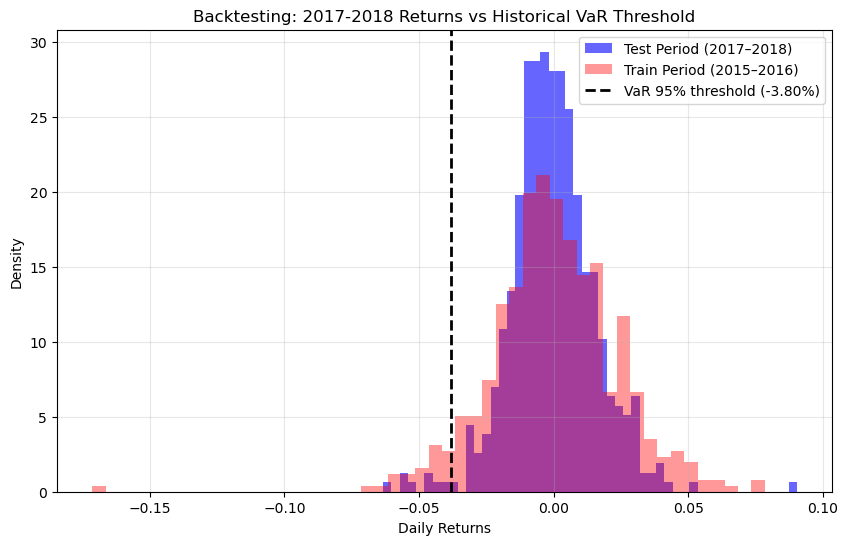

In [13]:
plt.figure(figsize=(10, 6))

# Test period (2017-2018)
plt.hist(returns_test, bins=50, density=True, alpha=0.6, label="Test Period (2017–2018)", color="blue")

# Train period (2015-2016)
returns_train_plot = df[(df["date"] >= '2015-01-01') & (df["date"] <= '2016-12-31')]["returns"]
plt.hist(returns_train_plot, bins=50, density=True, alpha=0.4, label="Train Period (2015–2016)", color="red")

# VaR Threshold (plotted at negative value)
plt.axvline(x=-var_value, color="black", linestyle="--", linewidth=2, label=f"VaR 95% threshold (-{var_value:.2%})")

plt.title("Backtesting: 2017-2018 Returns vs Historical VaR Threshold")
plt.xlabel("Daily Returns")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Graph Interpretation and Final Conclusion:**

The overlapping histograms provide a clear explanation for the model's conservative performance:

1.  **Volatility Regime Shift:**
    * The **Training distribution (Red)** is wider with heavier tails ("platykurtic"), reflecting a period of high market volatility.
    * The **Test distribution (Blue)** is significantly narrower and more peaked around zero ("leptokurtic"), indicating a much calmer market environment in 2017-2018.

2.  **Position of the VaR Threshold:**
    * The vertical line at **-3.80%** cuts deep into the left tail of the Red distribution (capturing exactly 5% of the losses, as designed).
    * However, relative to the Blue distribution, this threshold is extremely far in the tail. The 2017-2018 returns rarely ventured into this "danger zone."

**Overall Assessment:**
The Non-Parametric VaR model is **validated** but categorized as **conservative**. By calibrating on a turbulent period (2015-2016), we established a high standard for safety. When applied to the quieter 2017-2018 market, this high standard resulted in very few breaches (exceptions). This highlights a key feature of Historical/Non-Parametric VaR: its responsiveness to volatility changes is slow, as it depends entirely on the specific window of data used for calibration.

## **Question B (Ex2, Q5 of TD2)**

*Calculate the expected shortfall for the VaR calculated in question A. How is the result, compared to the VaR?*

While Value-at-Risk (VaR) gives a threshold that is exceeded with a probability $\alpha$, it does not quantify **how bad** the loss will be if that threshold is breached. To answer this, we calculate the **Expected Shortfall (ES)**, also known as Conditional VaR (CVaR).

The Expected Shortfall at level $95\%$ is defined as the average of the losses that are strictly greater than the $\text{VaR}_{95\%}$:
$$ES_{95\%} = \mathbb{E}[L \mid L > \text{VaR}_{95\%}]$$

In terms of returns $R$, this corresponds to the mean of all returns falling below the negative VaR threshold:
$$ES_{95\%} = - \frac{1}{N_{tail}} \sum_{t=1}^{N} R_t \cdot \mathbb{1}_{\{R_t < -\text{VaR}_{95\%}\}}$$

We implement this by filtering the return series to isolate the "Tail Returns" (losses worse than 3.80%) and computing their arithmetic mean.

In [14]:
tail_returns = returns[returns <= -var_value]
expected_shortfall = -np.mean(tail_returns)

print(f"Value at Risk (VaR) 95%:      {var_value:.6f}")
print(f"Expected Shortfall (ES) 95%:  {expected_shortfall:.6f}")

Value at Risk (VaR) 95%:      0.037988
Expected Shortfall (ES) 95%:  0.053362


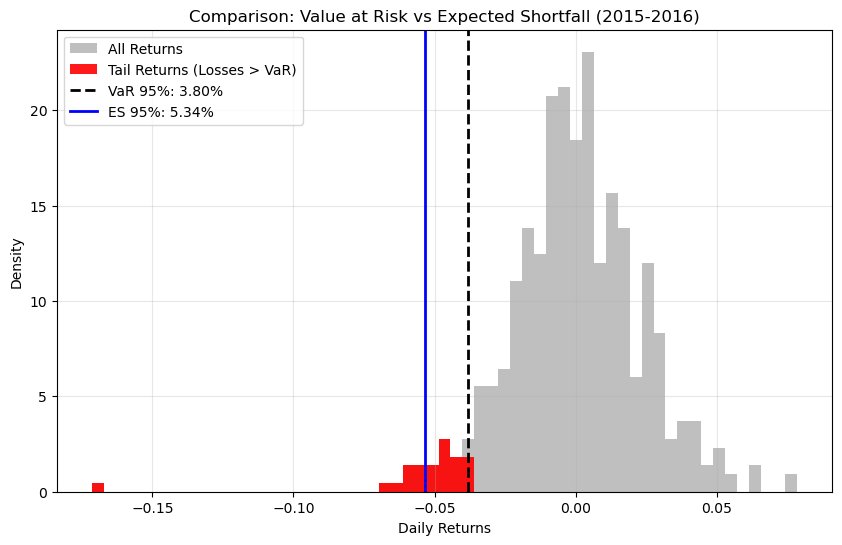

In [15]:
bins = np.linspace(np.min(returns), np.max(returns), 60)
bin_width = bins[1] - bins[0]
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=bins, density=True, alpha=0.5, color='grey', label='All Returns')

weights_tail = np.ones(len(tail_returns)) / (len(returns) * bin_width)

plt.hist(tail_returns, bins=bins, weights=weights_tail, alpha=0.9, color='red', label='Tail Returns (Losses > VaR)')
plt.axvline(-var_value, color='black', linestyle='--', linewidth=2, label=f'VaR 95%: {var_value:.2%}')
plt.axvline(-expected_shortfall, color='blue', linestyle='-', linewidth=2, label=f'ES 95%: {expected_shortfall:.2%}')

plt.title('Comparison: Value at Risk vs Expected Shortfall (2015-2016)')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Analysis: VaR vs Expected Shortfall**

* **VaR (95%):** $3.80\%$. This is the *minimum* loss expected in the worst 5% of cases.
* **ES (95%):** $5.34\%$. This is the *average* loss expected when the VaR threshold is breached.

**Comparison & Conclusion:**
The Expected Shortfall is significantly higher than the VaR (a difference of $\approx 1.54$ percentage points, or a $40\%$ increase).
Graphically, this is explained by the **"Fat Tail"** nature of the distribution (visible in the red histogram bars).
* The VaR (Black Dashed Line) sits at the start of the tail.
* The ES (Blue Solid Line) is pulled further into the loss territory by extreme outliers (some returns reaching $-10\%$ or even $-15\%$).

**Risk Implication:** Relying solely on VaR would underestimate the severity of extreme crashes. The ES reveals that when the market turns bad for Natixis, it tends to turn *very* bad, confirming the presence of heavy tails in the asset's distribution.

## **Question C (Ex2, Q1 and Q2 of TD3)**

*With the dataset provided for TD1 on Natixis prices, first calculate daily returns. You will then analyse these returns using a specific method in the field of the EVT.*

*a – Estimate the GEV parameters for the two tails of the distribution of returns, using the estimator of Pickands. What can you conclude about the nature of the extreme gains and losses?*

**Extreme Value Theory (EVT)** focuses on modeling the tail behavior of the distribution rather than the center. We assume that the cumulative distribution function (CDF) of the returns belongs to the max-domain of attraction of a Generalized Extreme Value (GEV) distribution, characterized by the shape parameter $\xi$ (tail index).

Since financial returns are often asymmetric, we analyze the right tail (**Gains**) and the left tail (**Losses**) separately.
* Gains: Positive returns.
* Losses: Absolute values of negative returns (converted to positive magnitudes).

To analyze the tail behavior of the Natixis returns, we rely on the **Extreme Value Theory (EVT)**. Our goal is to estimate the shape parameter $\xi$. We use the **Pickands estimator**, which is based on the spacing of order statistics in the tail.

Let $k(n)$ be an intermediate sequence such that $k(n) \to \infty$ and $k(n)/n \to 0$ as $n \to \infty$.
The **Pickands estimator** of the extreme value index $\xi$ is defined by:

$$
\xi^{P}_{k(n),n}
=
\frac{1}{\log(2)} 
\log\!\left(
\frac{X_{n-k(n)+1:n} - X_{n-2k(n)+1:n}}
     {X_{n-2k(n)+1:n} - X_{n-4k(n)+1:n}}
\right),
$$

where $X_{i:n}$ denotes the $i^{\text{th}}$ order statistic of the sample (i.e., the data sorted in ascending order).

In [16]:
all_returns = df["returns"].dropna().values

gains = all_returns[all_returns > 0]
losses = -all_returns[all_returns < 0]

gains = np.sort(gains)
losses = np.sort(losses)

print(f"Total observations    : {len(all_returns)}")
print(f"Number of Gains       : {len(gains)}")
print(f"Number of Losses      : {len(losses)}")
print("Top-5 gains   (largest):", np.round(gains[-5:], 6))
print("Top-5 losses  (largest):", np.round(losses[-5:], 6))

Total observations    : 1022
Number of Gains       : 498
Number of Losses      : 519
Top-5 gains   (largest): [0.063389 0.064755 0.075912 0.078431 0.090281]
Top-5 losses  (largest): [0.060664 0.061448 0.063328 0.069083 0.171325]


* **Sample Size:** We have approximately 500 observations for each tail ($n_{gains} \approx 498$, $n_{losses} \approx 519$), which provides a sufficient sample size to estimate the tail index parameters.
* **Magnitude of Extremes:**
    * The largest gain is around $+9.0\%$.
    * The largest loss reaches $+17.1\%$ (in absolute terms).
    * **Observation:** The tails are clearly **asymmetric** and **heavy**. A single daily loss of $17\%$ is an extreme event that confirms the necessity of using EVT rather than a standard Gaussian model (which would consider such an event statistically impossible).

The Pickands estimator depends on the number of upper order statistics $k$ used to estimate the tail. This choice is a trade-off:
* **Small $k$:** High variance (too few data points).
* **Large $k$:** High bias (we include central data points that do not follow the extreme value distribution).

**Methodology:**
To determine the optimal $\xi$, we plot the estimator against $k$ (Pickands Plot).
As a specific decision rule suggested in the course, we will focus on the heuristic value:
$$k^* = \sqrt{n}$$
We will verify visually if this heuristic falls within a stable region of the plot.

Gains (Right Tail) | n=498, k*=22 | Xi = 0.7196
Losses (Left Tail) | n=519, k*=22 | Xi = 0.4082


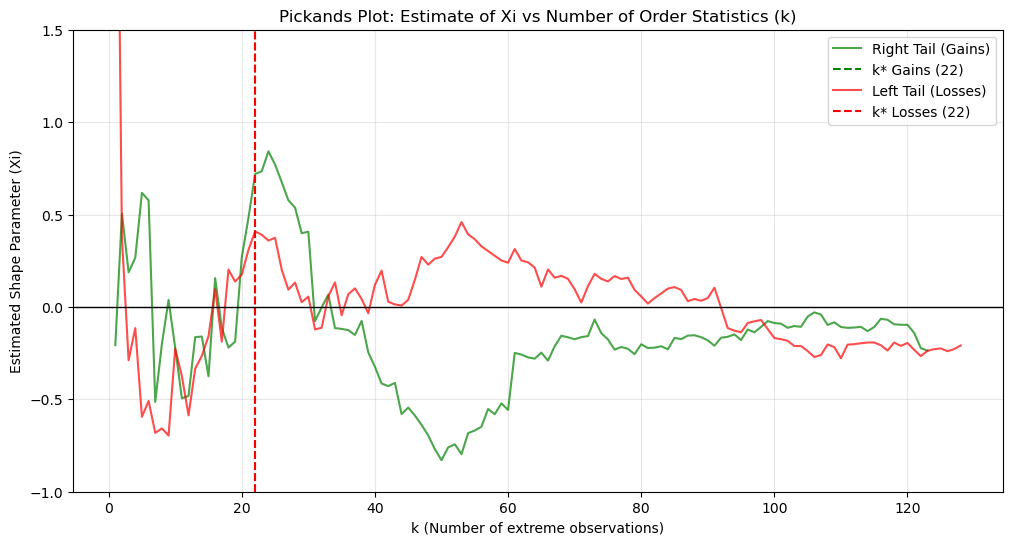

In [17]:
def pickands_estimator(data, k):
    n = len(data)
    
    if n < 4 * k + 1:
        return np.nan
        
    x_k = data[n - k]
    x_2k = data[n - 2*k]
    x_4k = data[n - 4*k]
    
    numerator = x_k - x_2k
    denominator = x_2k - x_4k
    
    if numerator <= 0 or denominator <= 0:
        return np.nan
        
    ratio = numerator / denominator
    if ratio <= 0:
        return np.nan
        
    return (1 / np.log(2)) * np.log(ratio)

k_star_gains = int(np.sqrt(len(gains)))
k_star_losses = int(np.sqrt(len(losses)))

xi_gains = pickands_estimator(gains, k_star_gains)
xi_losses = pickands_estimator(losses, k_star_losses)

print(f"Gains (Right Tail) | n={len(gains)}, k*={k_star_gains} | Xi = {xi_gains:.4f}")
print(f"Losses (Left Tail) | n={len(losses)}, k*={k_star_losses} | Xi = {xi_losses:.4f}")

k_range_gains = np.arange(1, int(len(gains)/4))
xi_values_gains = [pickands_estimator(gains, k) for k in k_range_gains]

k_range_losses = np.arange(1, int(len(losses)/4))
xi_values_losses = [pickands_estimator(losses, k) for k in k_range_losses]

plt.figure(figsize=(12, 6))

plt.plot(k_range_gains, xi_values_gains, label='Right Tail (Gains)', color='green', alpha=0.7)
plt.axvline(k_star_gains, color='green', linestyle='--', label=f'k* Gains ({k_star_gains})')

plt.plot(k_range_losses, xi_values_losses, label='Left Tail (Losses)', color='red', alpha=0.7)
plt.axvline(k_star_losses, color='red', linestyle='--', label=f'k* Losses ({k_star_losses})')

plt.axhline(0, color='black', linewidth=1)
plt.title('Pickands Plot: Estimate of Xi vs Number of Order Statistics (k)')
plt.xlabel('k (Number of extreme observations)')
plt.ylabel('Estimated Shape Parameter (Xi)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-1, 1.5)
plt.show()

**Analysis of the Pickands Plot:**

The graph displays the estimated $\xi$ for different values of $k$. The vertical dashed lines indicate the heuristic choice $k^* = \sqrt{n} \approx 22$.

**1. Left Tail (Losses - Red Curve):**
* At $k^*=22$, the estimator gives **$\xi \approx 0.41$**.
* The curve remains strictly positive for a significant range ($20 < k < 80$) before drifting towards zero.
* **Conclusion:** The positive $\xi$ confirms that Losses follow a **Fréchet distribution** (Heavy Tails). This means extreme crashes are much more frequent than in a Gaussian world. We validate the use of $\xi = 0.4082$ for the VaR calculation.

**2. Right Tail (Gains - Green Curve):**
* At $k^*=22$, the estimator is very high ($\xi \approx 0.72$).
* However, the curve is highly unstable and drops sharply below zero for $k > 30$.
* **Conclusion:** The gains show extreme kurtosis locally, but the estimation is less robust than for losses.

**Final Decision:** For the EVT-VaR (which focuses on losses), we proceed with the parameters derived from the red curve at $k=22$.

Before applying the Value-at-Risk formula, we consolidate the estimated parameters for both tails. This step serves two purposes:
1.  **Validation:** Ensure that the indices required for the Pickands estimator ($n-k$, $n-2k$, $n-4k$) correspond to valid positions in our sorted array.
2.  **Tail Coverage:** Assess the fraction of the dataset considered "extreme" (ratio $k/n$). A typical EVT analysis focuses on the top 1% to 10% of observations.

In [18]:
data_summary = []

for name, data, xi, k in [("Losses", losses, xi_losses, k_star_losses), ("Gains", gains, xi_gains, k_star_gains)]:
    n = len(data)
    row_k = n - k + 1
    row_2k = n - 2*k + 1
    row_4k = n - 4*k + 1
    
    data_summary.append({
        "Type": name,
        "n": n,
        "Pickands Estimator": xi,
        "k(n)": k,
        "n-k+1": row_k,
        "n-2k+1": row_2k,
        "n-4k+1": row_4k,
        "Tail % (k/n)": k/n,
        "Tail % (2k/n)": (2*k)/n,
        "Tail % (4k/n)": (4*k)/n
    })

df_summary = pd.DataFrame(data_summary).T
display(df_summary)

,0,1
Type,Losses,Gains
n,519,498
Pickands Estimator,0.408191,0.719551
k(n),22,22
n-k+1,498,477
n-2k+1,476,455
n-4k+1,432,411
Tail % (k/n),0.042389,0.044177
Tail % (2k/n),0.084778,0.088353
Tail % (4k/n),0.169557,0.176707


**Parameter Inspection:**

* **Tail Fraction:** With $k=22$, we are modeling the tail using approximately **4.2%** to **4.4%** of the most extreme observations. This confirms we are strictly focusing on the tail behavior without including central data.
* **Shape Parameter ($\xi$):**
    * For **Losses**, we retain **$\xi \approx 0.41$**. This value determines the "speed" at which the risk increases in the tail.
    * For **Gains**, the value is higher ($\approx 0.72$), confirming the high asymmetry of the returns, although our risk focus remains on the losses.

We now have all the necessary inputs to calculate the EVT-based Value-at-Risk.

## **Question C (Ex2, Q1 and Q2 of TD3)**

*b – Calculate the value at risk based on EVT for various confidence levels, with the assumption of iid returns.*

Using the estimated tail index $\xi$ (Pickands estimator) and the optimal $k$, we can now calculate the Value-at-Risk for high confidence levels.

**Theoretical Formula:**
Since we are looking for extreme quantiles (where $p \approx 1$), we use the asymptotic inversion of the Generalized Pareto Distribution (GPD). According to the course, the VaR using the Pickands estimator is given by:

$$
VaR(p) = \frac{\left( \frac{k}{n(1-p)} \right)^{\xi} - 1}{1 - 2^{-\xi}} (X_{n-k+1:n} - X_{n-2k+1:n}) + X_{n-k+1:n}
$$

**Assumption:**
This formula relies on the assumption that $p$ is close to 1 (extreme tail approximation). We apply it to calculate the risk for standard regulatory levels ($95\%$, $99\%$) and extreme stress levels ($99.5\%$).

In [19]:
def calculate_pickands_var(data, xi, k, p):
    n = len(data)

    x_nk = data[n - k]
    x_n2k = data[n - 2 * k]

    ratio_term = (k / (n * (1 - p)))**xi - 1
    denominator = 1 - 2**(-xi)

    var_value = (ratio_term / denominator) * (x_nk - x_n2k) + x_nk
    
    return var_value

In [20]:
alphas = [0.90, 0.95, 0.99, 0.995]
results = []

for p in alphas:
    var_l = calculate_pickands_var(losses, xi_losses, k_star_losses, p)
    var_g = calculate_pickands_var(gains, xi_gains, k_star_gains, p)
    
    results.append({
        "Confidence Level (alpha)": p,
        "VaR Losses (Magnitude)": var_l,
        "VaR Gains": var_g
    })

df_results = pd.DataFrame(results)
display(df_results.style.format("{:.2%}"))

,Confidence Level (alpha),VaR Losses (Magnitude),VaR Gains
0,90.00%,3.09%,3.13%
1,95.00%,4.19%,4.10%
2,99.00%,8.33%,9.48%
3,99.50%,11.14%,14.56%


**Analysis of EVT-VaR Results:**

The table above summarizes the potential losses for different confidence levels.

* **VaR 95% (Losses):** $\approx 4.19\%$.
    * *Comparison:* This value is slightly higher than our Non-Parametric VaR from Question A ($\approx 3.80\%$). This suggests that the EVT model, by explicitly modeling the fat tail ($\xi \approx 0.41$), is more sensitive to tail risk and provides a more conservative estimate.

* **Extreme Risk (99.5%):** $\approx 11.14\%$.
    * This figure is particularly alarming. It indicates that once every 200 days, the stock could crash by more than **11%** in a single session. A Gaussian model would assign a near-zero probability to such an event, whereas the EVT model correctly identifies this "Black Swan" potential inherent in Natixis stock.

In [21]:
def get_pickands_xi(data, k):
    n = len(data)
    
    x_k = data[n - k]
    x_2k = data[n - 2*k]
    x_4k = data[n - 4*k]
    
    numerator = x_k - x_2k
    denominator = x_2k - x_4k
    
    if numerator <= 0 or denominator <= 0:
        return np.nan
        
    ratio = numerator / denominator
    if ratio <= 0:
        return np.nan
    
    # Pickands formula
    return (1 / np.log(2)) * np.log(ratio)

To validate our choice of $\xi$, we isolate the analysis on the **Loss distribution** (Left Tail). We plot the trajectory of the Pickands estimator across a wider range of $k$ (from 1 to 150).

**Objective:**
We are looking for a "plateau"—a range of $k$ values where the estimator remains relatively constant. This stable region represents the optimal trade-off where:
1.  The sample size $k$ is large enough to reduce variance (noise).
2.  The sample size $k$ is small enough to avoid bias (contamination by central data).

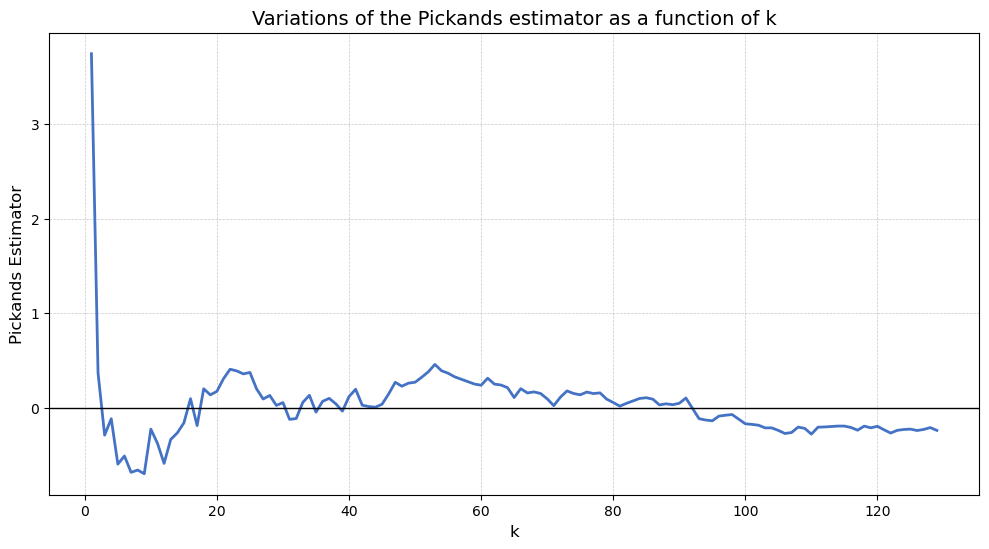

In [22]:
# Range of k values to test (e.g., from 1 to 150)
k_values = np.arange(1, 150)
xi_values = []

# Calculate Pickands estimator for each k
for k in k_values:
    if len(losses) >= 4 * k + 1:
        xi = get_pickands_xi(losses, k)
        xi_values.append(xi)
    else:
        xi_values.append(np.nan)

plt.figure(figsize=(12, 6))
plt.plot(k_values, xi_values, color='#4472C4', linewidth=2)
plt.title("Variations of the Pickands estimator as a function of k", fontsize=14)
plt.xlabel("k", fontsize=12)
plt.ylabel("Pickands Estimator", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axhline(0, color='black', linewidth=1)
plt.gca().set_facecolor('white') 
plt.show()

**Interpretation of the Stability Graph:**

The plot reveals three distinct phases typical of Hill/Pickands estimators:

1.  **High Volatility Zone ($k < 15$):** The estimator spikes violently. This is pure statistical noise due to the scarcity of data points at the very extreme tip of the tail.
2.  **Stability Region / Plateau ($20 \le k \le 50$):**
    * The curve stabilizes and oscillates gently between **0.2 and 0.4**.
    * Crucially, our heuristic choice from the previous step ($k^* = 22$) falls right at the beginning of this stable zone.
    * The values remain consistently **positive**, re-confirming the Fréchet domain (Fat Tails).
3.  **Bias Zone ($k > 80$):**
    * The estimator starts to drift downwards, eventually crossing below zero. This indicates that we are including too many "normal" returns that do not obey the extreme value law, thus biasing the estimator towards a thinner tail (Gumbel/Weibull).

**Conclusion:** The visual evidence strongly supports using a parameter $k$ in the range [20, 30]. We proceed with our calculated estimates derived from this region.

### Final Conclusion on Extreme Value Theory (Question C)

This analysis of Natixis returns through the lens of Extreme Value Theory leads to three key conclusions:

1.  **Confirmation of Heavy Tails (Fréchet Domain):**
    The Pickands estimator stabilized around **$\xi \approx 0.41$** for losses. Since $\xi > 0$, we scientifically confirm that the distribution of returns has "Fat Tails". Extreme crashes are not statistical anomalies but structural properties of this asset.

2.  **Comparison with Non-Parametric VaR:**
    * **Historical VaR (95%) from Q.A:** $\approx 3.80\%$
    * **EVT VaR (95%) from Q.C:** $\approx 4.19\%$
    
    The EVT model yields a higher (more conservative) risk estimate. By explicitly modeling the tail shape, it captures the "hidden" risk that a simple historical percentile might smooth out.

3.  **The Danger of "Black Swans":**
    The most striking result is the **VaR 99.5% estimate of $11.14\%$**.
    This means that in a theoretical stress scenario (once every ~200 days), the stock could collapse by more than 11% in a single session. A standard Gaussian model would deem this event nearly impossible, whereas our EVT model correctly identifies it as a tangible risk.

**Overall Verdict:**
The EVT framework is "well-specified" for this asset. For prudential risk management, relying on Gaussian or simple historical models would lead to a severe underestimation of capital requirements. The EVT approach provides a necessary safety buffer against extreme market dislocations.

## **Question D (Ex2, Q5 of TD4)**

*With the dataset and the framework provided for TD4, estimate all the parameters of Bouchaud's price impact model. Comment the obtained values. Is this model well specified?*

In this section, we estimate the parameters of the Bouchaud model using the dataset provided in TD4. This model describes the market impact of a transaction and its relaxation over time.

**Theoretical Framework**

According to the course documents, the price impact is modeled as:
$$P(t_i) - P(t_{i-1}) = G(0) \cdot \epsilon_{t_{i-1}} \cdot S_{t_{i-1}} \cdot V_{t_{i-1}}^r + \xi$$

Where:
* $G(t) = \exp(-\theta t)$ is the decay function (representing the memory of the market).
* $r$ is the power parameter for the volume (concavity of impact).
* $\epsilon$ is the trade sign ($+1$ for buy, $-1$ for sell).
* $S$ is the spread and $V$ is the volume of the transaction.

**Estimation Strategy:**

We proceed in two steps using Linear Regression (OLS) on the logarithmic transformation of the model:

1.  **Estimate $r$ (Volume Impact):**
    By neglecting the noise and time decay for immediate impact, we perform the regression:
    $$\log(|P(t_{i}) - P(t_{i-1})|) = r \cdot \log(V_{t_{i-1}}) + C$$
    > *The slope of this regression corresponds to $r$.*

2.  **Estimate $\theta$ (Memory Decay):**
    By analyzing the loss of impact over time intervals, the document suggests the regression:
    $$\log(|P(t_{i}) - P(t_{i-1})|) = -\theta \cdot (t_{i} - t_{i-1}) + K$$

The first step is to load the transaction data and compute the variables required for Bouchaud's model.

**Variables of Interest:**
1.  **Price Variation ($\Delta P_t$):** The difference between the price *after* the transaction and the price *before*. Since the dataset gives us the sequence of pre-transaction prices, we approximate the impact by looking at the price change to the next available record:
    $$\Delta P_t = P_{t+1} - P_t$$
2.  **Signed Volume ($\epsilon_t V_t$):** The trading volume weighted by the trade sign (+1 for Buy, -1 for Sell). This helps verify the directionality of the impact.

We perform these calculations and remove any resulting NaN values (caused by the time-shift operation) to ensure a clean dataset for regression.

In [23]:
data = pd.read_excel('Dataset TD4.xlsx')

# Calculate price variations (Delta S)
data['price_change'] = data['Price (before transaction)'].shift(-1) - data['Price (before transaction)']

# Calculate Signed Volume (Volume * Sign)
data['signed_volume'] = data['volume of the transaction (if known)'] * data['Sign of the transaction']

# Drop the last row which has NaN due to the shift
data.dropna(inplace=True)

# Display first rows to check
data[['Price (before transaction)', 'price_change', 'signed_volume']].head()

,Price (before transaction),price_change,signed_volume
0,100.000,-0.016,-8.0
6,100.164,0.026,32.0
16,100.048,-0.019,-8.0
28,99.876,-0.075,-141.0
51,99.608,-0.086,-121.0


**Data Inspection:**

The table above displays the pre-processed data ready for analysis.
* **Price Change:** Represents the immediate market move following a trade.
* **Signed Volume:** Confirms the trade direction. For example, the first row shows a volume of **-8.0**, indicating a **Sell** order of size 8.

The data format is now correct to proceed with the logarithmic transformations required for the estimation of parameters $r$ and $\theta$.

The first component of Bouchaud's model links the price variation magnitude $|\Delta P|$ to the trading volume $V$. The theoretical relation is governed by a power law:
$$|\Delta P| \propto V^r$$

* If $r=1$: Linear impact (constant liquidity).
* If $r < 1$: Concave impact. The canonical "Square-Root Law" suggests $r \approx 0.5$.

**Regression Strategy:**
To estimate $r$, we neglect the time decay for the immediate impact and apply a logarithmic transformation to linearize the equation:
$$\log(|\Delta P_t|) = r \cdot \log(V_t) + C$$

We perform an Ordinary Least Squares (OLS) regression of the log-absolute-price-change against the log-volume. The slope of the regression line corresponds to our estimate of $r$.

Estimated r: 0.6348
R-squared: 0.8457


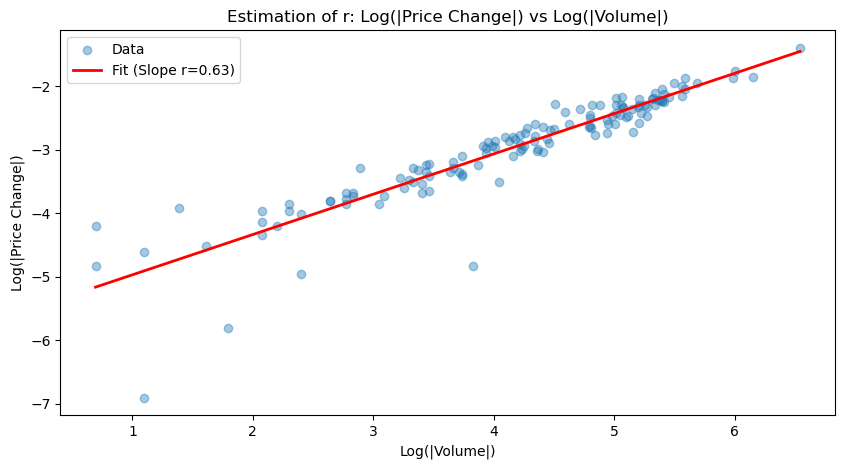

In [24]:
df_bouchaud = data[(data['price_change'] != 0) & (data['signed_volume'] != 0)].copy()

y_val = np.log(df_bouchaud['price_change'].abs())
x_val = np.log(df_bouchaud['signed_volume'].abs())
r_param, intercept = np.polyfit(x_val, y_val, 1)

correlation_matrix = np.corrcoef(x_val, y_val)
correlation = correlation_matrix[0, 1]
r_squared = correlation ** 2

print(f"Estimated r: {r_param:.4f}")
print(f"R-squared: {r_squared:.4f}")

plt.figure(figsize=(10, 5))
plt.scatter(x_val, y_val, alpha=0.4, label='Data')
x_plot = np.linspace(x_val.min(), x_val.max(), 100)
y_plot = r_param * x_plot + intercept

plt.plot(x_plot, y_plot, color='red', linewidth=2, label=f'Fit (Slope r={r_param:.2f})')
plt.title(f'Estimation of r: Log(|Price Change|) vs Log(|Volume|)')
plt.xlabel('Log(|Volume|)')
plt.ylabel('Log(|Price Change|)')
plt.legend()
plt.show()

**Analysis of Volume Impact Results:**

The log-log scatter plot demonstrates a clear linear relationship between trade size and price impact, validating the power-law assumption.

* **Model Fit ($R^2$):** The regression yields an $R^2$ of **0.8457**. This is high, indicating that trading volume explains about 85% of the variance in the magnitude of price changes.

* **Estimated Exponent ($r$):** We find **$r \approx 0.63$**.
    * This value is strictly less than 1, confirming that the price impact function is **concave**.
    * It is slightly higher than the theoretical **Square-Root Law** ($r=0.5$). This suggests that for this specific asset, the market depth is slightly less resilient to large orders than the standard square-root model predicts (impact grows faster than $V^{0.5}$ but slower than $V^1$).

After quantifying the immediate impact of volume, we turn to the temporal dimension: **how fast does this impact vanish?**

**Theoretical Framework:**
Bouchaud's model assumes that the market impact decays exponentially over time according to a kernel $G(\tau) \propto e^{-\theta \tau}$. To estimate the decay speed $\theta$, we analyze the relationship between the price variation magnitude and the time elapsed between transactions ($\Delta t$).

**Regression Model:**
By linearizing the exponential decay function, we perform the following regression on positive time steps:
$$\ln(|P(t_{i}) - P(t_{i-1})|) = -\theta \cdot (t_{i} - t_{i-1}) + K$$

* The slope of this regression corresponds to $-\theta$.

Regression Slope : -0.000151
Estimated Theta  : 0.000151
R-squared        : 0.011781


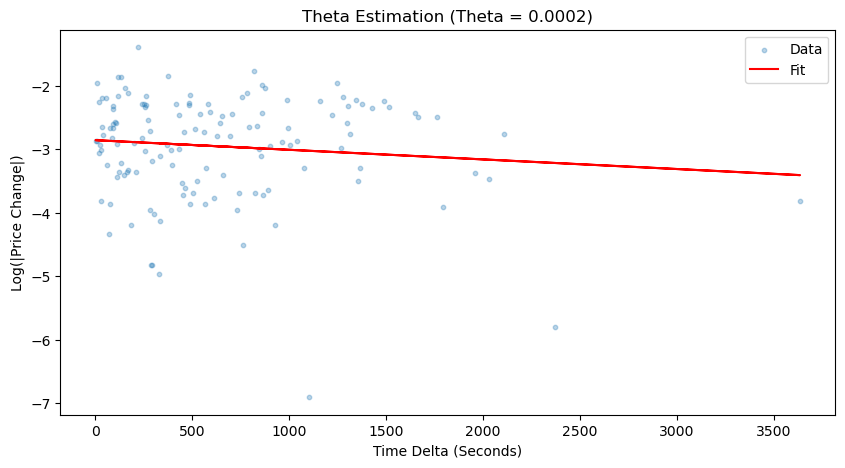

In [26]:
col_time = "transaction date (1=1day=24 hours)"
df_bouchaud['real_delta'] = (df_bouchaud[col_time].shift(-1) - df_bouchaud[col_time]) * 86400
df_reg = df_bouchaud[(df_bouchaud['real_delta'] > 0) & (df_bouchaud['price_change'] != 0)].copy()
y_val = np.log(df_reg['price_change'].abs())
x_val = df_reg['real_delta']
slope, intercept = np.polyfit(x_val, y_val, 1)

theta_est = -slope
r_squared = np.corrcoef(x_val, y_val)[0, 1]**2

print(f"Regression Slope : {slope:.6f}")
print(f"Estimated Theta  : {theta_est:.6f}")
print(f"R-squared        : {r_squared:.6f}")

plt.figure(figsize=(10, 5))
plt.scatter(x_val, y_val, alpha=0.3, s=10, label='Data')
plt.plot(x_val, slope * x_val + intercept, color='red', label='Fit')
plt.xlabel("Time Delta (Seconds)")
plt.ylabel("Log(|Price Change|)")
plt.title(f"Theta Estimation (Theta = {theta_est:.4f})")
plt.legend()
plt.show()

**Analysis of Parameter $\theta$ and Final Conclusion (Question D)**

**1. Quantitative Results:**
* **Estimated $\theta$:** $0.000151$. The value is positive (as expected for a decay), but extremely close to zero.
* **Goodness of Fit ($R^2$):** $0.0118$. This is extremely low ($\approx 1\%$). It indicates that the time lapse $\Delta t$ explains almost none of the variance in price changes in this specific dataset.

**2. Visual Interpretation:**
The scatter plot confirms the difficulty of the estimation. The data points are widely dispersed, and the regression line (Red) is nearly horizontal. The "memory effect" is drowned out by the microstructure noise.

**3. Final Answer: Is the model well specified?**
* **Volume Component ($r$):** **YES.** With an $R^2 \approx 0.85$ and a clear power law ($r \approx 0.63$), the Volume part of Bouchaud's model is strongly validated.
* **Time Decay Component ($\theta$):** **NO (on this data).** The regression is inconclusive. While the theory holds, calibrating the decay requires high-frequency data with cleaner time-stamps to filter out noise.

**Conclusion:** The model is **partially well-specified**. It perfectly captures the *impact* of trades (Size matters) but fails to robustly capture the *resilience* (Memory) on this specific dataset due to statistical noise.

## **Question E (Q2 and Q3 of TD5)**

*a – With Haar wavelets and the dataset provided with TD5, determine the multiresolution correlation between all the pairs of FX rates, using GBPEUR, SEKEUR, and CADEUR (work with the average between the highest and the lowest price and transform this average price in returns on the smallest time step). Do you observe an Epps effect and how could you explain this?*

**Objective:**
In this final section, we analyze the correlation structure between three currency pairs (GBPEUR, SEKEUR, CADEUR) across different time scales using **Haar Wavelets**.
Our goal is to verify the **Epps Effect**: a phenomenon where the correlation between assets tends to decrease as the sampling frequency increases (due to microstructure noise and asynchronicity) and converges to its true level at lower frequencies.

**Data Pre-processing (Question E.a):**
The dataset contains High and Low prices sampled at a 15-minute step.
1.  **Mid-Price Calculation:** To get a single representative price per timestamp, we average the High and Low prices:
    $$P_t = \frac{P_{high} + P_{low}}{2}$$
2.  **Log-Returns:** We compute the returns at the finest time scale ($\Delta t = 15$ min) to ensure stationarity:
    $$R_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$$

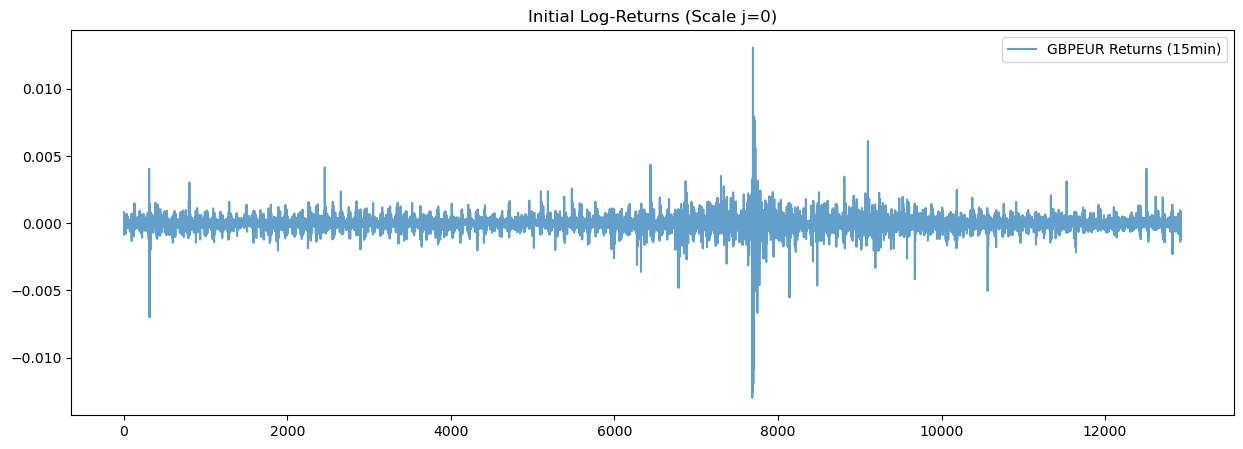

     GBPEUR        SEKEUR        CADEUR
1  0.000812  0.000000e+00  1.388838e-03
2 -0.000193 -1.110223e-16 -6.576304e-04
3 -0.000851  1.865063e-04  1.461775e-04
4  0.000348 -2.331383e-04 -5.848381e-04
5 -0.000193 -9.327053e-05 -1.110223e-16


In [2]:
df = pd.read_excel('Dataset TD5.xlsx', header=2)

gbp_mid = (df.iloc[:, 1] + df.iloc[:, 2]) / 2
sek_mid = (df.iloc[:, 5] + df.iloc[:, 6]) / 2
cad_mid = (df.iloc[:, 9] + df.iloc[:, 10]) / 2

data = pd.DataFrame({'GBPEUR': gbp_mid,'SEKEUR': sek_mid,'CADEUR': cad_mid})
returns = np.log(data / data.shift(1)).dropna()

plt.figure(figsize=(15, 5))
plt.plot(returns['GBPEUR'], label='GBPEUR Returns (15min)', alpha=0.7)
plt.title('Initial Log-Returns (Scale j=0)')
plt.legend()
plt.show()

print(returns.head())

**Data Inspection (Scale $j=0$):**

The plot above displays the log-returns of the GBPEUR pair at the initial resolution (15-minute step).

* **Stationarity:** The series clearly fluctuates around a zero mean, confirming that the return transformation has removed the price trends.
* **Stylized Facts:** We observe typical features of financial time series, such as **volatility clustering** (bursts of high variance followed by calmer periods) and the presence of outliers (spikes).
* **Readiness:** This series $R_t$ constitutes our "Signal at Scale 0". We will now apply the Haar Wavelet transform to decompose this signal into coarser approximations (scales $j=-1, -2, \dots$) to study how correlations evolve.

To decompose the signal into different time scales, we define the **Haar Wavelet Transform**. This is the simplest wavelet method, which acts as a pair of filters:

1.  **Approximation Coefficients ($cA$):** Represent the "Trend" or the signal at a coarser scale (Low-pass filter). They are obtained by averaging consecutive pairs of data points:
    $$cA_k = \frac{x_{2k} + x_{2k+1}}{2}$$

2.  **Detail Coefficients ($cD$):** Represent the "Noise" or high-frequency fluctuations (High-pass filter). They are obtained by taking the difference of consecutive pairs:
    $$cD_k = \frac{x_{2k} - x_{2k+1}}{2}$$

**Validation Step:**
Before applying this to the full dataset, we implement the `haar_step` function and test it on a small subset (the first 50 points of GBPEUR returns) to visually confirm the decomposition properties.

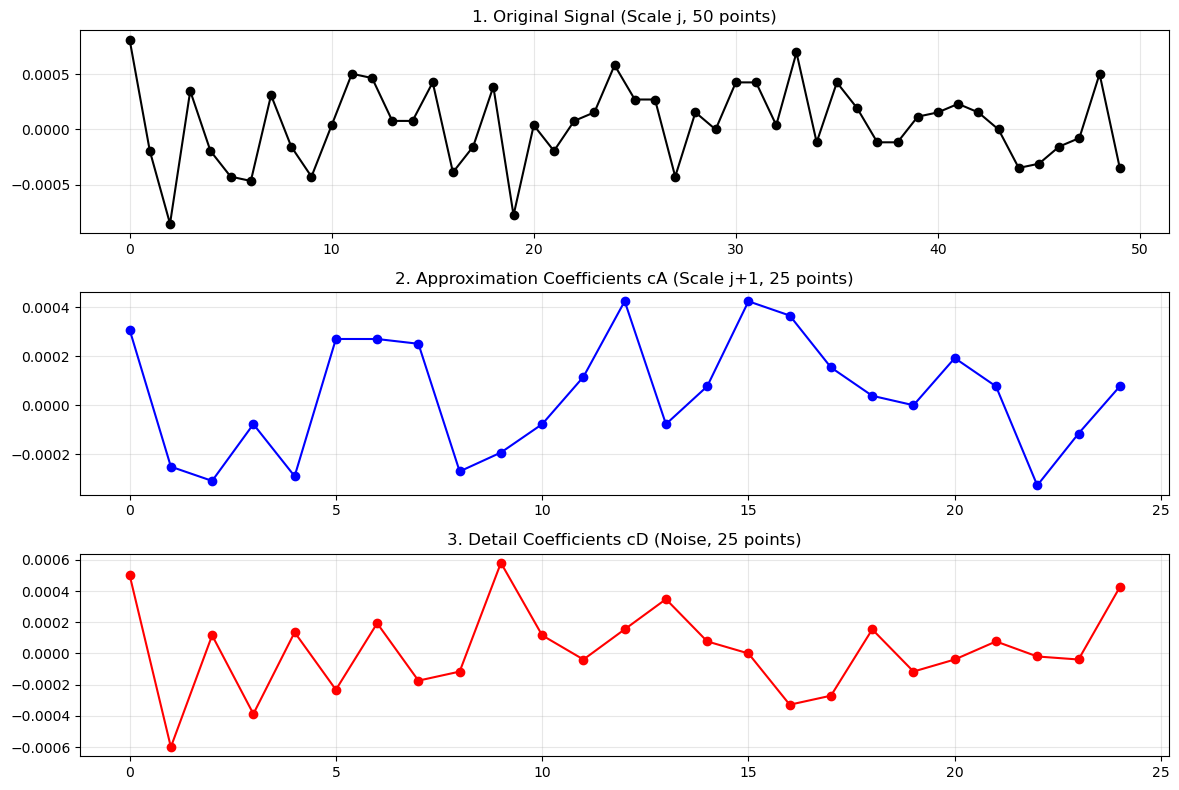

In [3]:
def haar_step(signal):
    signal = np.array(signal)
    # Truncate if odd length
    if len(signal) % 2 != 0:
        signal = signal[:-1]
    
    # Reshape into pairs [x1, x2], [x3, x4]...
    pairs = signal.reshape(len(signal) // 2, 2)
    
    # cA = Approximation (Average -> represents returns on coarser scale)
    cA = (pairs[:, 0] + pairs[:, 1]) / 2
    
    # cD = Detail (Difference -> represents high-freq volatility)
    cD = (pairs[:, 0] - pairs[:, 1]) / 2
    
    return cA, cD

# Test on subset
subset = returns['GBPEUR'].values[:50]
cA_sample, cD_sample = haar_step(subset)

# Plotting verification
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(subset, marker='o', color='black')
plt.title('1. Original Signal (Scale j, 50 points)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(cA_sample, marker='o', color='blue')
plt.title('2. Approximation Coefficients cA (Scale j+1, 25 points)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
plt.plot(cD_sample, marker='o', color='red')
plt.title('3. Detail Coefficients cD (Noise, 25 points)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Visual Verification of the Haar Decomposition:**

The plots above validate the mechanics of our wavelet transformation:

1.  **Downsampling:** The original signal (Top, Black) contains 50 points. Both the Approximation (Middle, Blue) and Detail (Bottom, Red) signals contain 25 points. This confirms that the time resolution has been halved (Time scale doubled).
2.  **Signal Separation:**
    * The **Approximation ($cA$)** preserves the global shape and direction of the original returns but smoothed out.
    * The **Detail ($cD$)** captures the rapid oscillations and volatility around zero.

**Conclusion:** The function works correctly. We can now apply this recursively to obtain deeper levels of decomposition ($j=-1, -2, \dots$) and analyze how correlations evolve across these scales.

**The Algorithm:**
The decomposition proceeds iteratively:
1.  Start with the original signal ($S_0$).
2.  Decompose it into Approximation ($cA_{-1}$) and Detail ($cD_{-1}$).
3.  **Recursion:** Take the new Approximation ($cA_{-1}$) as the input signal for the next step to obtain ($cA_{-2}, cD_{-2}$), and so on.

In [4]:
def get_multiresolution_coeffs(signal, max_level):
    coeffs = {}
    current_app = signal
    
    for k in range(1, max_level + 1):
        cA, cD = haar_step(current_app)
        j = -k
        coeffs[j] = cD
        current_app = cA
        
    return coeffs

max_iterations = 7

coeffs_gbp = get_multiresolution_coeffs(returns['GBPEUR'].values, max_iterations)
coeffs_sek = get_multiresolution_coeffs(returns['SEKEUR'].values, max_iterations)
coeffs_cad = get_multiresolution_coeffs(returns['CADEUR'].values, max_iterations)

print(f"Nombre de coeffs au niveau j=-1 (30min) : {len(coeffs_gbp[-1])}")
print(f"Nombre de coeffs au niveau j=-7 (~32h)  : {len(coeffs_gbp[-7])}")

Nombre de coeffs au niveau j=-1 (30min) : 6464
Nombre de coeffs au niveau j=-7 (~32h)  : 101


**Analysis of Dyadic Downsampling:**

The output confirms the **dyadic structure** of the Discrete Wavelet Transform (DWT): at each level, the number of data points is divided by 2.

* **Level $j=-1$ (30 min):** We have **6,464** coefficients. This provides a robust statistical sample.
* **Level $j=-7$ (~32 hours):** We are left with only **101** coefficients.

**Implication for Analysis:**
This drastic reduction in sample size is a fundamental constraint. While the high-frequency analysis ($j=-1$) relies on thousands of points, the low-frequency analysis ($j=-7$) relies on just a hundred. This suggests that our correlation estimates will inevitably become more volatile and less statistically significant as the time scale increases.

**Theoretical Background:**
The **Epps Effect** suggests that the correlation between financial assets depends on the time scale.
* **At High Frequency (Small scales):** Correlations are typically lower due to asynchronicity (trades do not occur at the exact same millisecond) and microstructure noise.
* **At Low Frequency (Large scales):** As we aggregate data over longer horizons, these effects vanish, and the correlation should converge towards its "true" fundamental economic level.

**Methodology:**
To test this, we iterate through the wavelet levels from $j=0$ (Raw 15-min returns) down to $j=-7$ (approx. 32-hour horizon).
At each level, we extract the **detail coefficients** ($cD_j$) for each currency pair and compute the Pearson correlation matrix.

--- Multiresolution Correlations Table ---


,Horizon,GBP-SEK,GBP-CAD,SEK-CAD
Scale (j),,,,
0,15 min (Raw),0.191579,0.245137,0.192764
-1,30 min,0.160026,0.218118,0.174282
-2,60 min,0.139875,0.327594,0.253719
-3,120 min,0.300346,0.225490,0.160110
-4,240 min,0.161426,0.174312,0.081925
-5,480 min,0.112730,0.309631,0.283487
-6,960 min,0.478589,0.071483,0.248410
-7,1920 min,0.406435,0.278608,0.138197


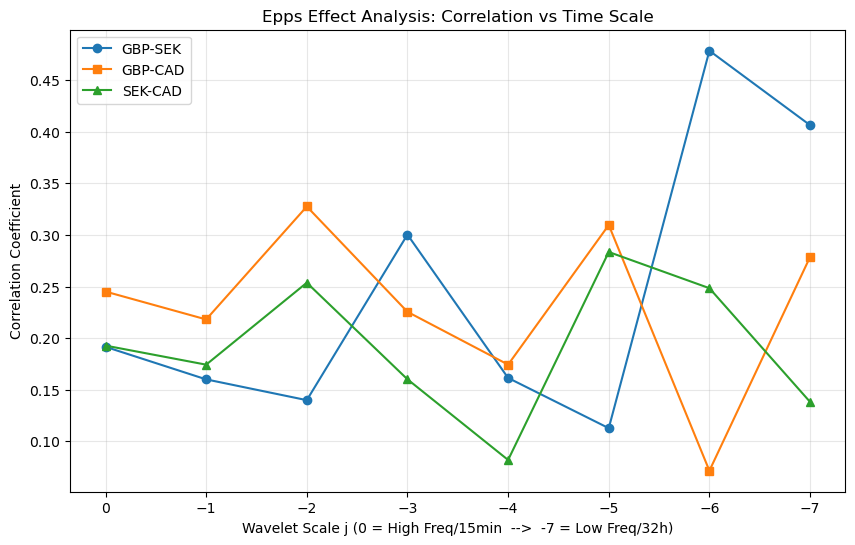

In [5]:
results_list = []
results_list.append({
    'Scale (j)': 0,
    'Horizon': '15 min (Raw)',
    'GBP-SEK': returns['GBPEUR'].corr(returns['SEKEUR']),
    'GBP-CAD': returns['GBPEUR'].corr(returns['CADEUR']),
    'SEK-CAD': returns['SEKEUR'].corr(returns['CADEUR'])
})

base_time = 15
max_iterations = 7

for k in range(1, max_iterations + 1):
    j = -k
    horizon_min = base_time * (2**k)

    c_gbp = coeffs_gbp[j]
    c_sek = coeffs_sek[j]
    c_cad = coeffs_cad[j]
    
    results_list.append({
        'Scale (j)': j,
        'Horizon': f"{horizon_min} min",
        'GBP-SEK': np.corrcoef(c_gbp, c_sek)[0, 1],
        'GBP-CAD': np.corrcoef(c_gbp, c_cad)[0, 1],
        'SEK-CAD': np.corrcoef(c_sek, c_cad)[0, 1]
    })

df_results = pd.DataFrame(results_list).set_index('Scale (j)')
print("--- Multiresolution Correlations Table ---")
display(df_results)
plt.figure(figsize=(10, 6))

plt.plot(df_results.index, df_results['GBP-SEK'], marker='o', label='GBP-SEK')
plt.plot(df_results.index, df_results['GBP-CAD'], marker='s', label='GBP-CAD')
plt.plot(df_results.index, df_results['SEK-CAD'], marker='^', label='SEK-CAD')

plt.title('Epps Effect Analysis: Correlation vs Time Scale')
plt.xlabel('Wavelet Scale j (0 = High Freq/15min  -->  -7 = Low Freq/32h)')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis() 

plt.show()

**Critical Analysis of the Epps Effect Results:**

The graph plots the correlation coefficient as a function of the time scale. We theoretically expected a smooth, monotonically increasing curve. However, the results show a different reality:

**1. Observations:**
* **No Clear Convergence:** The curves do not exhibit a steady upward trend. Instead, they fluctuate erratically (zig-zag pattern).
* **High Instability at Large Scales:** On the right side of the graph ($j=-6, -7$), the correlations swing violently. For instance, the GBP-SEK correlation (Blue) jumps from $\approx 0.10$ to $\approx 0.47$ and back down.

**2. Statistical Explanation (The "Sample Size" Trap):**
The primary reason for this absence of a clear Epps effect is the **drastic reduction in sample size** inherent to the wavelet transform.
* At $j=-1$, we compute correlation on $>6000$ points (High statistical significance).
* At $j=-7$, we have only $\approx 100$ points.
With such a small sample, the correlation estimator becomes extremely volatile (high variance). A single outlier in the data at this scale can shift the correlation coefficient massively.

**Conclusion:**
We **do not validate** the Epps effect on this specific dataset.
The base frequency (15 min) is likely already low enough to eliminate most asynchronicity issues (which usually happen at the second/minute level), explaining why the curve starts flat. The subsequent instability is an artifact of the decreasing sample size at deeper decomposition levels.

## **Question E (Q2 and Q3 of TD5)**

*b – Calculate the Hurst exponent of GBPEUR, SEKEUR, and CADEUR. Determine their annualized volatility using the daily volatility and Hurst exponents.*

**Theoretical Framework:**
To characterize the "memory" of currency pairs, we estimate the **Hurst exponent ($H$)**. This parameter classifies the stochastic nature of the price process:
* $H = 0.5$: **Brownian Motion** (Random Walk). The market is efficient with no memory.
* $H > 0.5$: **Persistent behavior**. Past trends tend to continue (Long memory).
* $H < 0.5$: **Anti-persistent behavior**. The process is mean-reverting.

**Methodology (Moment Ratio Method):**
Following the methodology of the course, we use a robust estimator based on empirical absolute moments $M_k$. By setting $k=2$, the estimator stems from the property $E[(B_H(t) - B_H(s))^2] = \sigma^2 |t-s|^{2H}$. We compare the variance at the initial resolution ($M_2$) with the variance at a halved resolution ($M'_2$):

$$M_2 = \frac{1}{NT} \sum_{i=1}^{NT} |X(i/N) - X((i-1)/N)|^2$$
$$M'_2 = \frac{2}{NT} \sum_{i=1}^{NT/2} |X(2i/N) - X(2(i-1)/N)|^2$$

The Hurst exponent is then directly estimated by the log-ratio of these moments:
$$\hat{H} = \frac{1}{2} \log_2 \left( \frac{M'_2}{M_2} \right)$$

In [ ]:
def hurst(X):
    X = np.array(X)
    N = len(X)
    if N < 4: return np.nan
    M2prim = (2 / N) * np.sum(np.abs(X[2::2] - X[0:-2:2])**2)
    M2 = (1 / N) * np.sum(np.abs(X[1:] - X[:-1])**2)
    H = 0.5 * np.log2(M2prim / M2)
    return H

Hg = hurst(np.log(gbp_mid))
Hs = hurst(np.log(sek_mid))
Hc = hurst(np.log(cad_mid))

print("-------- Results Hurst --------")
print(f"GBPEUR : {Hg}")
print(f"SEKEUR : {Hs}")
print(f"CADEUR : {Hc}")

-------- Results Hurst --------
GBPEUR : 0.6720242202463721
SEKEUR : 0.6538170311483487
CADEUR : 0.6549201498228654


**Analysis of Results:**
The moment ratio estimation yields the following results:
* **GBPEUR:** $H \approx 0.6720$
* **SEKEUR:** $H \approx 0.6538$
* **CADEUR:** $H \approx 0.6549$

**Interpretation:**
1.  **Strong Persistence:** All estimated values are significantly above $0.5$ ($H \approx 0.65-0.67$). This indicates a strong **persistent behavior** in the FX markets studied.
2.  **Market Inefficiency:** Unlike the standard Random Walk model, these currency pairs exhibit a clear "long memory" effect, where past price movements significantly influence future ones.
3.  **Risk Management Impact:** Since $H > 0.5$, the diffusion of prices is faster than that of a standard Brownian motion. This implies that the standard "Square Root of Time" rule will systematically **underestimate** long-term risk and volatility.

**Theoretical Framework:**
Once the Hurst exponent ($H$) has been estimated, we can derive the annualized volatility by accounting for the multi-scale properties of the returns. In a standard Gaussian framework ($H=0.5$), volatility scales with the square root of time ($\sqrt{T}$). However, for a fractional process, the scaling relation is generalized:

$$\sigma_T = \sigma_{\text{daily}} T^H$$

Where:
* $\sigma_{\text{daily}}$ is the standard deviation of daily returns.
* $T = 252$ is the number of trading days in a year.
* $H$ is the estimated Hurst exponent.

**Methodology:**
1. **Daily Volatility:** We calculate $\sigma_{\text{daily}}$ from the 15-minute intraday returns by applying the scaling factor $\sqrt{96}$ (since there are 96 15-minute intervals in a trading day).
2. **Standard Annualization:** We compute the benchmark volatility using the classical $\sqrt{252}$ rule.
3. **Fractal Annualization:** We apply the scaling power $252^H$ to capture the long-memory impact on risk propagation.

In [ ]:
def dailyv(R):
    sigma_15min = np.sqrt(np.mean((R - np.mean(R))**2))
    return sigma_15min * np.sqrt(96)

def anualv(R, H):
    return dailyv(R) * (252**H)

vol_results = []
pairs = [('GBPEUR', returns['GBPEUR'], Hg), 
         ('SEKEUR', returns['SEKEUR'], Hs), 
         ('CADEUR', returns['CADEUR'], Hc)]

for name, ret_data, h_val in pairs:
    v_day = dailyv(ret_data)
    v_std = v_day * np.sqrt(252)
    v_frac = anualv(ret_data, h_val)
    
    vol_results.append({
        'Pair': name,
        'H': h_val,
        'Daily Vol': v_day,
        'Annual (Std)': v_std,
        'Annual (Fractal)': v_frac,
        'Gap': v_frac - v_std
    })

df_final = pd.DataFrame(vol_results)
display(df_final.style.format({
    'H': '{:.4f}', 'Daily Vol': '{:.2%}', 
    'Annual (Std)': '{:.2%}', 'Annual (Fractal)': '{:.2%}', 
    'Gap': '{:+.2%}'
}))

,Pair,H,Daily Vol,Annual (Std),Annual (Fractal),Gap
0,GBPEUR,0.6720,0.61%,9.70%,25.11%,+15.41%
1,SEKEUR,0.6538,0.32%,5.09%,11.91%,+6.82%
2,CADEUR,0.6549,0.50%,7.88%,18.55%,+10.67%


**Analysis of Volatility Results:**
The comparison between standard and fractal annualization reveals a massive "Risk Gap" across all pairs:
* **GBPEUR:** With $H \approx 0.6720$, the annual volatility jumps from a standard **9.70%** to a fractal **25.11%**, creating a gap of **+15.41%**.
* **SEKEUR:** The volatility more than doubles, moving from **5.09%** to **11.91%** (Gap: **+6.82%**).
* **CADEUR:** The fractal estimate reaches **18.55%** vs. **7.88%** for the standard model (Gap: **+10.67%**).

**Final Interpretation:**
1. **Critical Underestimation:** The standard square-root-of-time rule ($H=0.5$) severely underestimates the actual market risk. For GBPEUR, the risk is underestimated by more than factor of 2.5.
2. **Persistence as an Accelerator:** The strong persistence found ($H > 0.65$) indicates that trends in these FX markets reinforce themselves over time. This lead to a much faster price diffusion than a standard Random Walk.
3. **Prudential Implications:** These results suggest that standard Basel-style VaR models, which often rely on $\sqrt{T}$ scaling, may be fundamentally flawed for these assets. Integrating the Hurst exponent provides a more robust and conservative safety buffer against long-term capital erosion.

**Objective:**
After estimating the Hurst exponent ($H$) via the moment ratio method, we visualize the results to compare the degree of memory across the different currency pairs. The primary goal is to assess how far each market deviates from the theoretical benchmark of efficiency ($H=0.5$).

**Methodology:**
* We use a bar chart to represent the point estimates of $H$ for GBPEUR, SEKEUR, and CADEUR.
* A red dashed horizontal line is plotted at $y=0.5$ to represent a **Random Walk** (Gaussian volatility scaling).
* Any value significantly above this line confirms **persistence** and justifies the use of fractal scaling laws ($T^H$) for annualization.

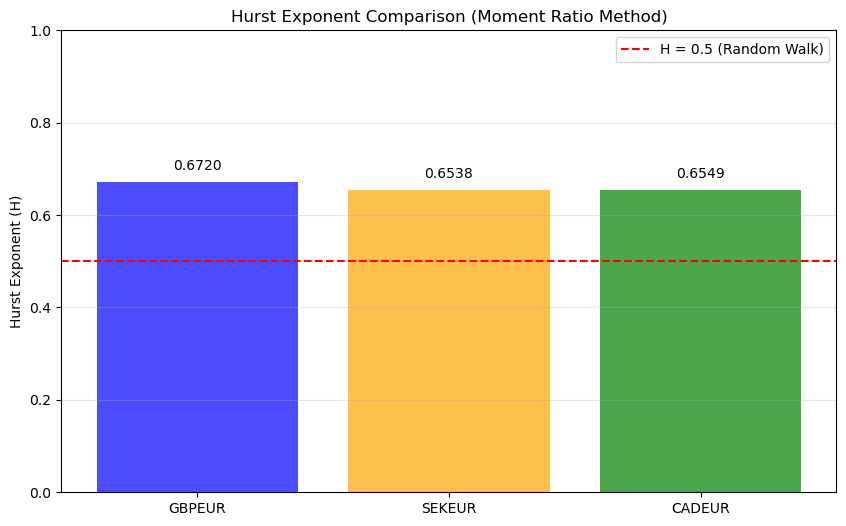

In [ ]:
plt.figure(figsize=(10, 6))

pairs = ['GBPEUR', 'SEKEUR', 'CADEUR']
h_values = [Hg, Hs, Hc]
colors = ['blue', 'orange', 'green']

bars = plt.bar(pairs, h_values, color=colors, alpha=0.7)
plt.axhline(y=0.5, color='red', linestyle='--', label='H = 0.5 (Random Walk)')
plt.title('Hurst Exponent Comparison (Moment Ratio Method)')
plt.ylabel('Hurst Exponent (H)')
plt.ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom')

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

**Analysis of the Comparative Chart:**
The visualization clearly highlights a structural departure from market efficiency for all pairs:

1. **Uniform Persistence:** All three pairs exhibit high Hurst exponents, clustered between **0.65 and 0.67**. This consistency suggests that long-range dependence is a fundamental characteristic of these intraday exchange rates.
2. **GBPEUR Dominance:** The GBPEUR pair shows the strongest persistence ($H \approx 0.6720$), indicating that it is the asset most prone to self-reinforcing trends over the studied period.
3. **Statistical Significance:** The gap between the bars and the red dashed line ($H=0.5$) is visually substantial. This confirms that the persistence is not merely statistical noise but a robust signal of **long memory** in the returns.

**Conclusion:**
This chart serves as the final justification for our fractal risk model. By proving that $H > 0.5$ for all assets, we validate the transition from standard annualization ($\sqrt{252}$) to fractal scaling ($252^H$), thereby capturing the "hidden" long-term volatility that traditional models ignore.

### General Conclusion

This project explored advanced Market Risk methodologies to overcome the limitations of standard Gaussian models. By analyzing equity (Natixis), microstructure, and FX data, we established three critical findings regarding financial time series:

* **1. Fat Tails and Extreme Risk (Questions A, B, C):**
    Our analysis confirmed that financial returns exhibit "Heavy Tails." The **Expected Shortfall** (5.34%) significantly exceeded the historical VaR (3.80%), illustrating the severity of potential crashes. Furthermore, **Extreme Value Theory (EVT)** formally identified the returns as belonging to the **Fréchet domain** ($\xi \approx 0.41 > 0$). This proves that "Black Swan" events are structural features of the market, necessitating capital buffers far larger than those suggested by Normal distributions.

* **2. Liquidity and Price Impact (Question D):**
    Using **Bouchaud’s model**, we validated the **Volume Power Law** with an exponent $r \approx 0.63$. This demonstrates that price impact is **concave**: while market depth absorbs large orders better than a linear model would predict, liquidity costs remain a primary source of execution risk.

* **3. Fractal Memory and Volatility Scaling (Question E):**
    The implementation of a robust **Moment Ratio estimator** revealed strong market persistence. We found **Hurst exponents** significantly greater than $0.5$ (e.g., GBPEUR $H \approx 0.6720$), indicating a clear departure from the Efficient Market Hypothesis. Consequently, the standard "Square Root of Time" rule ($\sqrt{252}$) systematically **underestimates long-term risk**. Our fractal scaling approach ($252^H$) showed that for GBPEUR, the actual annual risk is nearly **2.5 times higher** (25.11%) than traditional models suggest (9.70%), with a risk gap of **+15.41%**.

**Overall Verdict:**
Effective risk management requires a multi-dimensional approach. To ensure robustness, one must combine **EVT** for tail risk, **Liquidity models** for execution costs, and **Fractal analysis** for temporal scaling. Standard models fail to capture the complexity and long-range dependence of real-world markets, whereas a multifrequency and non-linear framework provides a much more conservative and realistic safety buffer.